# Import packages

In [1]:
# # if using google drive
# %cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

In [1]:
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

%load_ext autoreload
%autoreload 2




from data_wrangling import specific_utils, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_class, cluster_replacement_utils
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_class, GUAT_vs_TAFT_x_sessions_class, helper_GUAT_vs_TAFT_class
from visualization.matplotlib_tools import plot_trials, plot_behaviors_utils
from visualization.animation import animation_class
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from visualization.plotly_polar_tools import plotly_utils_polar, plotly_for_ff_polar, plotly_for_trajectory_polar
from machine_learning.ml_methods import ml_methods_class

import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os.path import exists
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import gc
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
import os, sys, sys
from importlib import reload
from sklearn.exceptions import ConvergenceWarning


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 50



# Run overnight

In [2]:
# Predict TAFT vs GUAT
for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    cgtxs = GUAT_vs_TAFT_x_sessions_class.GUATandTAFTacrossSessionsClass()
    combd_GUAT_x_df, combd_TAFT_x_df = cgtxs.streamline_getting_combd_GUAT_or_TAFT_x_df(monkey_name=monkey_name)

# Predict num_stops
combined_info_exists_ok = True
for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    gc_kwargs_temp = helper_GUAT_vs_TAFT_class.gc_kwargs.copy()
    gc_kwargs_temp['num_old_ff_per_row'] = 2
    gc_kwargs_temp['num_new_ff_per_row'] = 3

    gas = GUAT_combine_info_class.GUATCombineInfoAcrossSessions(gc_kwargs_temp, monkey_name=monkey_name)
    gas.retrieve_or_make_combined_info(gc_kwargs_temp, combined_info_exists_ok=combined_info_exists_ok, 
                                    traj_df_exist_in_GUAT_store_ok=True)

data_0219
data_0220
data_0221
data_0222
data_0226
data_0227
data_0228
data_0301
data_0306
data_0307
data_0308
data_0309
data_0312
data_0314
data_0315
data_0316
data_0321
data_0322
data_0323
data_0326
data_0327
data_0328
data_0329
data_0330
data_0402
data_0219
data_0220
data_0221
data_0222
data_0226
data_0227
data_0228
data_0301
data_0306
data_0307
data_0308
data_0309
data_0312
data_0314
data_0315
data_0316
data_0321
data_0322
data_0323
data_0326
data_0327
data_0328
data_0329
data_0330
data_0402
data_0219
data_0220
data_0221
data_0222
data_0226
data_0227
data_0228
data_0301
data_0306
data_0307
data_0308
data_0309
data_0312
data_0314
data_0315
data_0316
data_0321
data_0322
data_0323
data_0326
data_0327
data_0328
data_0329
data_0330
data_0402
data_0219
data_0220
data_0221
data_0222
data_0226
data_0227
data_0228
data_0301
data_0306
data_0307
data_0308
data_0309
data_0312
data_0314
data_0315
data_0316
data_0321
data_0322
data_0323
data_0326
data_0327
data_0328
data_0329
data_0330
data_0402


# predict TAFT vs GUAT

## DEBUG

In [9]:
cgtxs.cgt.GUAT_df

,stop_point_index,ff_index,stop_time,stop_cum_distance,beginning_time,point_index_ff_first_seen,point_index_ff_last_seen,monkey_angle_ff_first_seen,monkey_angle_ff_last_seen,time_ff_first_seen,time_ff_last_seen
0,2213,222,36.65090,4742.57654,34.65090,2156.00000,2173.00000,1.28167,1.41157,35.70478,35.98702
1,2642,358,43.75553,7708.39271,41.75553,NaN,NaN,NaN,NaN,NaN,NaN
2,4024,109,66.59670,12753.79042,64.59670,3941.00000,3958.00000,-2.26342,-2.27035,65.21899,65.50119
3,6858,476,113.17544,21202.23074,111.17544,6818.00000,6835.00000,-0.59360,-0.57788,112.51144,112.79361
4,7226,169,119.28417,21961.61667,117.28417,7181.00000,7198.00000,-0.27260,-0.22889,118.53713,118.81936
...,...,...,...,...,...,...,...,...,...,...,...
112,206581,1158,3398.75172,662042.59870,3396.75172,206507.00000,206524.00000,-1.40511,-1.36271,3397.52305,3397.80519
113,212403,1284,3494.39914,682215.21150,3492.39914,212305.00000,212322.00000,2.33352,2.60242,3492.77165,3493.05379
114,214286,1203,3525.27403,687024.02475,3523.27403,214166.00000,214171.00000,-1.15371,-1.15371,3523.28261,3523.36562
115,216176,1228,3556.34921,694244.84091,3554.34921,216096.00000,216113.00000,1.89831,1.75811,3555.05440,3555.33658


## data across sessions

In [4]:
monkey_name='monkey_Bruno'
cgtxs = GUAT_vs_TAFT_x_sessions_class.GUATandTAFTacrossSessionsClass()
# now, put the data into a GUATvsTAFTclass instance for downstream analysis
cgt = GUAT_vs_TAFT_class.GUATvsTAFTclass()
cgt.GUAT_x_df, cgt.TAFT_x_df = cgtxs.streamline_getting_combd_GUAT_or_TAFT_x_df(monkey_name=monkey_name)

data_0219
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0219/ff_dataframe.h5
When take out monkey subset for GUAT, 512 clusters out of 679 are too close to the target or the last target. Those clusters are filtered out.
Percentage of control rows that have nxt ff cluster flashed on between stop_time - 2 and stop:             71.79 % of 117 rows.
Percentage of control rows that have nxt ff cluster flashed on between stop time and next stop:             94.02 % of 117 rows.
Filtered out 2 stop periods out of 117 stop periods because they are not in front of the monkey at ref point
Number of unique ff in the dropped rows: 3
There are 7 out of 187 columns with NA.
The shape of x_df is: (115, 187)
data_0220
Retrieved monkey_information
The number of points that were removed due to delta_p

KeyboardInterrupt: 

## data for one session

In [ ]:
exists_ok = False

cgt = GUAT_vs_TAFT_class.GUATvsTAFTclass(ref_point_mode='time', 
                                            raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
                                            ref_point_value=-1.5,)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='TAFT', exists_ok=exists_ok)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='GUAT', exists_ok=exists_ok)


In [ ]:
# test and see what is taking so long in running a function
import cProfile

cProfile.run("cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='GUAT', exists_ok=False, GUAT_w_ff_df_exists_ok=False)", sort='cumtime')

#ncalls  tottime  percall  cumtime  percall

## ML

### get data & vif

In [6]:
cgt.get_x_and_y_var_df()
ml_inst = ml_methods_class.MlMethods(x_var_df=cgt.x_var_df,
                                     y_var_df=cgt.y_var_df)

There are 14 columns with NA that are dropped. 143 columns are left. The dropped columns with number of NA are:
cur_ff_flash_duration_at_ref             1162
cur_ff_earliest_flash_rel_time_at_ref    1162
cur_ff_latest_flash_rel_time_at_ref      1162
opt_arc_curv                          59
opt_arc_measure                        59
opt_arc_d_heading                      59
cntr_arc_curv                          59
curv_mean                                 113
curv_std                                  115
curv_min                                  113
curv_Q1                                  113
curv_median                                  113
curv_Q3                                  113
curv_max                                  113
dtype: int64


In [19]:
# can skip this if only wanting ML results

pd.set_option('display.max_rows', 100)
ml_inst.use_vif(ml_inst.x_var_df)
features_w_big_vif = ml_inst.vif_df[ml_inst.vif_df['vif'] > 100].feature.values
#ml_inst.x_var_df = ml_inst.x_var_df.drop(columns=features_w_big_vif)

0 out of 129 features are processed.
10 out of 129 features are processed.
20 out of 129 features are processed.
30 out of 129 features are processed.
40 out of 129 features are processed.
50 out of 129 features are processed.
60 out of 129 features are processed.
70 out of 129 features are processed.
80 out of 129 features are processed.
90 out of 129 features are processed.
100 out of 129 features are processed.
110 out of 129 features are processed.
120 out of 129 features are processed.
                                              features       VIF
114       cur_ff_cluster_100_combd_median_ff_distance 608.90000
51        cur_ff_ang_cluster_20_combd_max_ff_distance 543.80000
104        nxt_ff_cluster_200_combd_median_ff_distance 465.10000
61                              nxt_ff_distance_at_ref 381.10000
112          cur_ff_cluster_100_combd_min_ff_distance 277.00000
..                                                 ...       ...
16   cur_ff_ang_cluster_20_RIGHTMOST_angle_diff_bo..

In [20]:
ml_inst.vif_df.head(20)

,features,VIF
114,cur_ff_cluster_100_combd_median_ff_distance,608.90000
51,cur_ff_ang_cluster_20_combd_max_ff_distance,543.80000
104,nxt_ff_cluster_200_combd_median_ff_distance,465.10000
61,nxt_ff_distance_at_ref,381.10000
112,cur_ff_cluster_100_combd_min_ff_distance,277.00000
113,cur_ff_cluster_100_combd_max_ff_distance,264.50000
103,nxt_ff_cluster_200_combd_max_ff_distance,263.30000
67,monkey_speed_range,238.30000
65,monkey_speed_std,224.30000
52,cur_ff_ang_cluster_20_combd_median_ff_distance,213.60000


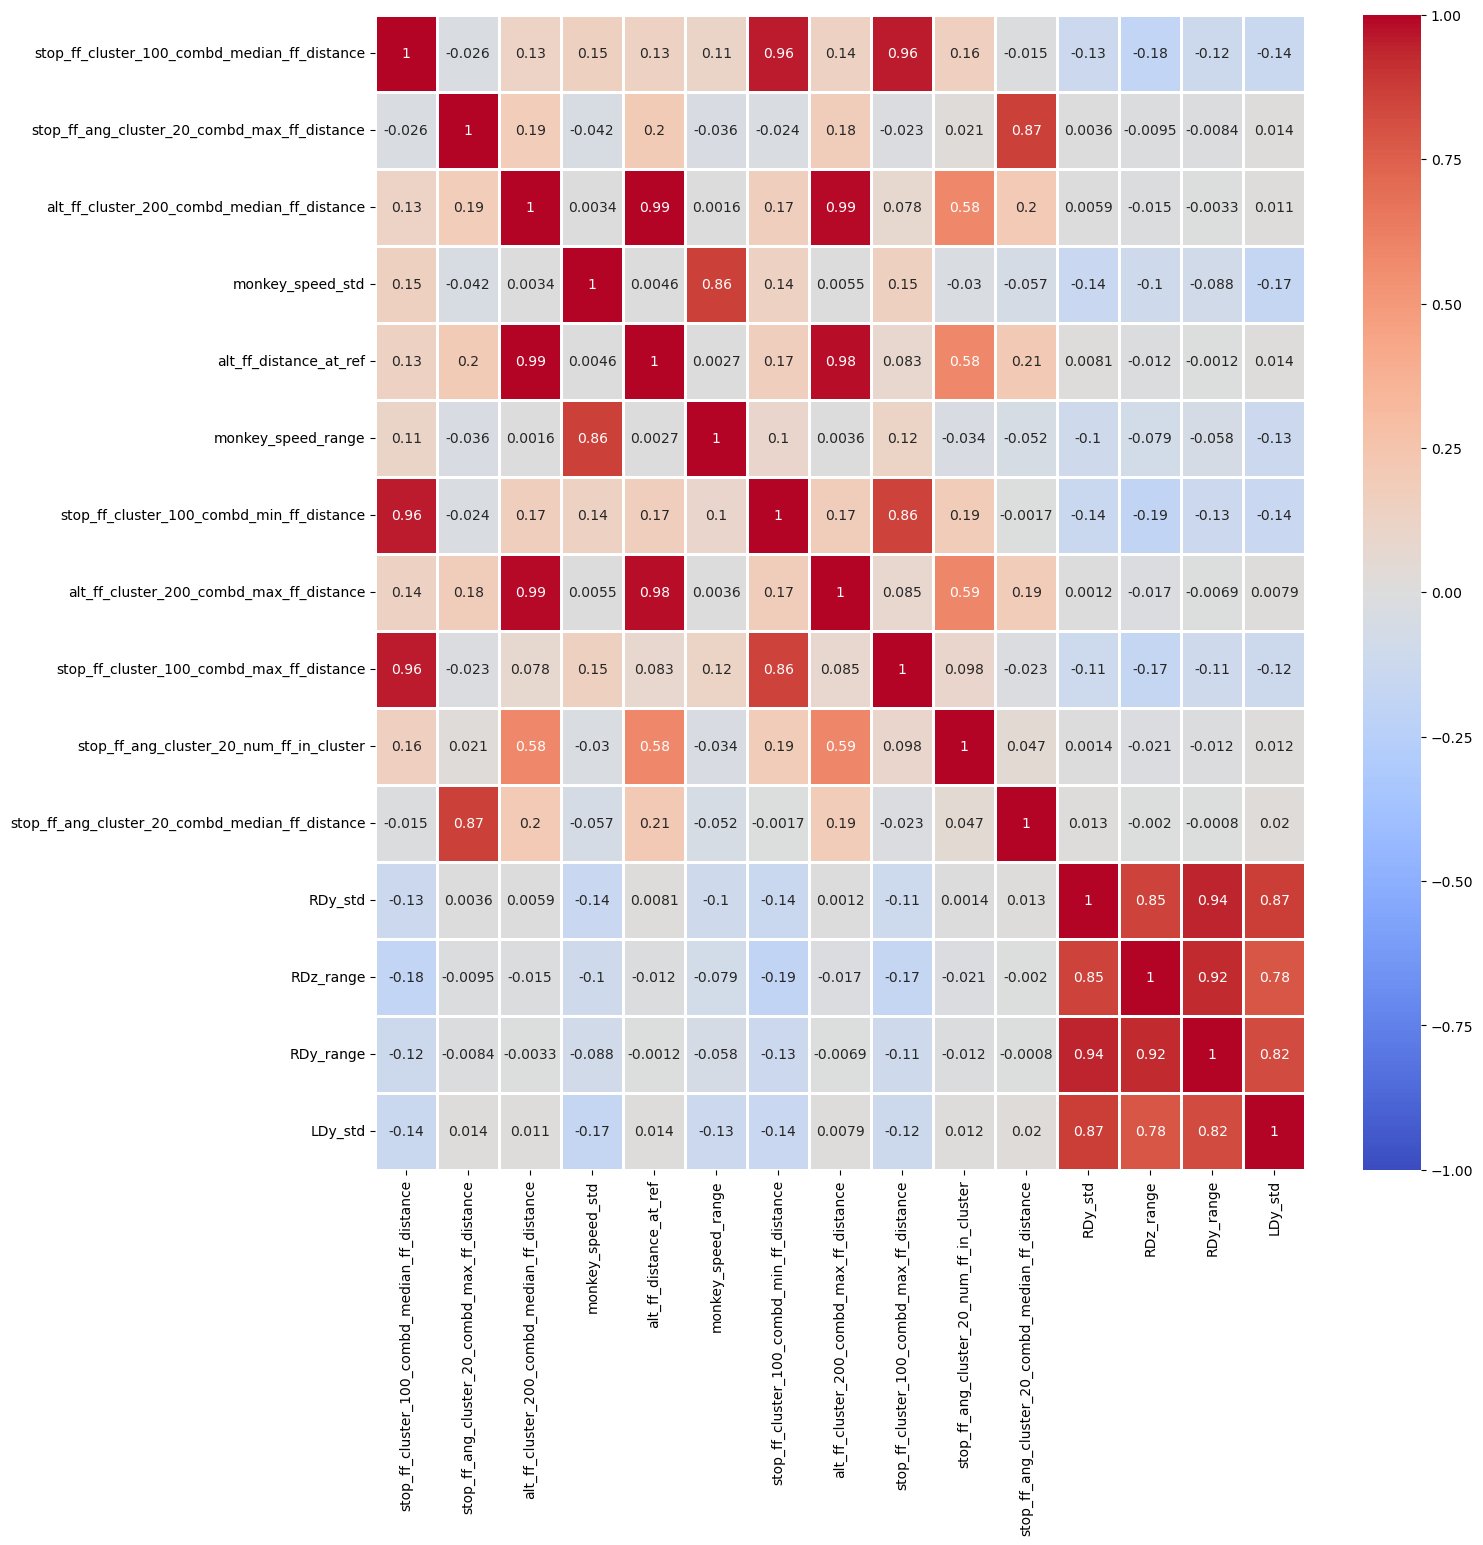

In [9]:
# specific_columns = ml_inst.vif_df[ml_inst.vif_df["VIF"] > 2000].feature.values
# ml_inst.show_correlation_heatmap(specific_columns=specific_columns)
ml_inst.show_correlation_heatmap()

In [14]:
df = ml_inst.x_var_df

In [ ]:
# [col for col in df.columns if 'cluster' not in col]

### run ML

In [7]:
ml_inst.use_ml_model_for_classification(ml_inst.x_var_df, ml_inst.y_var_df, model=None)


model: gnb
model: logreg


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

model: dt
model: bagging


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model: boosting


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


model: grad_boosting


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model: rf


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


model: svm


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


           model  accuracy
3        bagging   0.81550
5  grad_boosting   0.80738
6             rf   0.79705
4       boosting   0.78598
2             dt   0.72030
1         logreg   0.69889
7            svm   0.68487
0            gnb   0.67306


The model with the highest accuracy is: BaggingClassifier(bootstrap_features=True, max_features=0.9, n_estimators=200,
                  random_state=42) !!
chosen model accuracy: 0.8154981549815498
chosen model confusion matrix: [[342 167]
 [ 83 763]]
          Predicted 1  Predicted 2
Actual 1          342          167
Actual 2           83          763


In [8]:
763 / (342 + 167 + 83 + 763)

0.56309963099631

In [53]:
322/(1460+350)

0.8066298342541437

In [26]:
(44+1412) / (145+363+44+1412)

0.7413441955193483

### grad_boosting (so that we can see feature importance)

/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


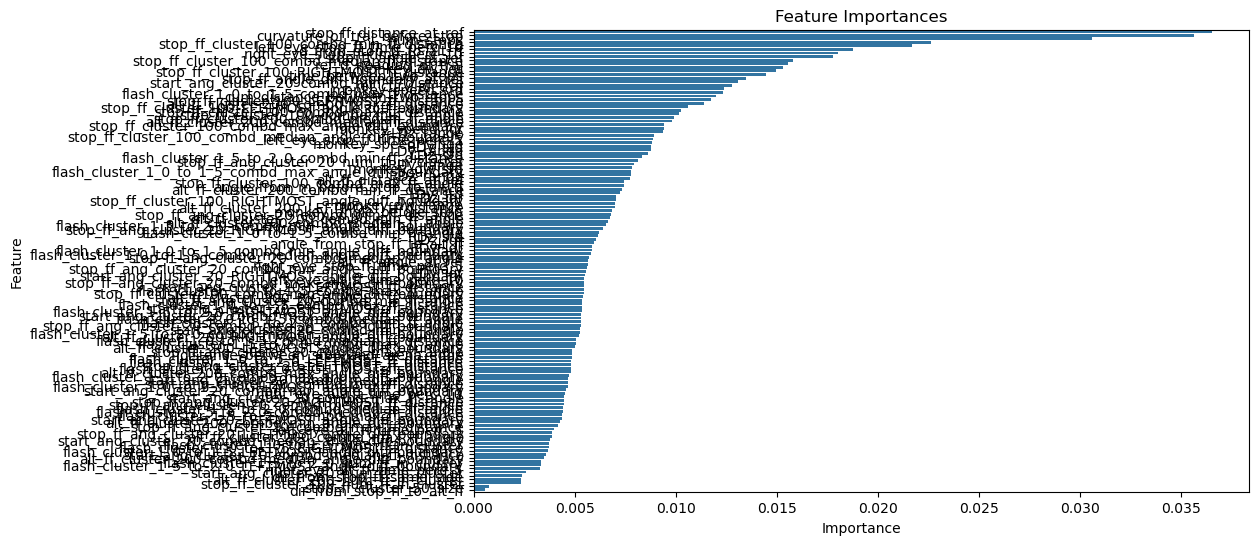

Significant features:
                                              Feature  Importance
63                            cur_ff_distance_at_ref     0.03651
125                     curv_of_traj_before_stop     0.03566
128                                         num_stops     0.03062
112         cur_ff_cluster_100_combd_min_ff_distance     0.02262
72                      left_eye_cur_ff_time_perc_10     0.02167
57                           d_from_cur_ff_to_nxt_ff     0.01877
76                     right_eye_cur_ff_time_perc_10     0.01801
64                               cur_ff_angle_at_ref     0.01777
114      cur_ff_cluster_100_combd_median_ff_distance     0.01579
121                             ref_d_heading_of_traj     0.01558
70                                      monkey_dw_iqr     0.01530
97          cur_ff_cluster_100_RIGHTMOST_ff_distance     0.01495
60                             time_between_two_stops     0.01448
0                  cur_ff_angle_diff_boundary_at_ref     0.01348
40

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ml_inst.x_var_df, ml_inst.y_var_df, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingClassifier(
    learning_rate=0.05, max_depth=7, max_features='sqrt',
    min_samples_leaf=2, min_samples_split=7,
    n_estimators=500, subsample=0.5
)


# Fit the model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': ml_inst.x_var_df.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

# Determine significant features (e.g., importance > 0.01)
significant_features = feature_importances_df[feature_importances_df['Importance'] > 0.01]
print("Significant features:")
print(significant_features)

In [12]:
TAFT = cgt.TAFT_x_df.copy()
TAFT['whether_TAFT'] = 1
GUAT = cgt.GUAT_x_df.copy()
GUAT['whether_TAFT'] = 0
both_df = pd.concat([TAFT, GUAT], axis=0)

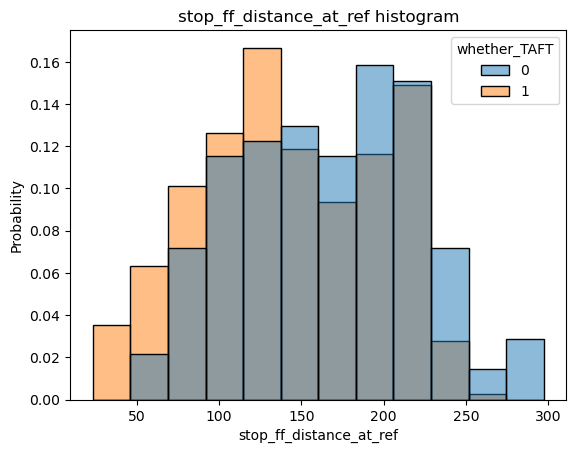

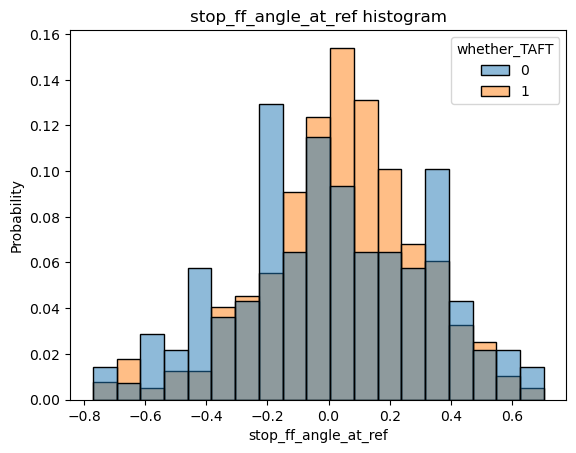

In [17]:

# for each feature in significant_features, plot the histogram of the feature for each class
for feature in ['cur_ff_distance_at_ref', 'cur_ff_angle_at_ref']:
    sns.histplot(x=feature, data=both_df, stat='probability', kde=False, hue='whether_TAFT', common_norm=False)
    plt.title(f'{feature} histogram')
    plt.show()

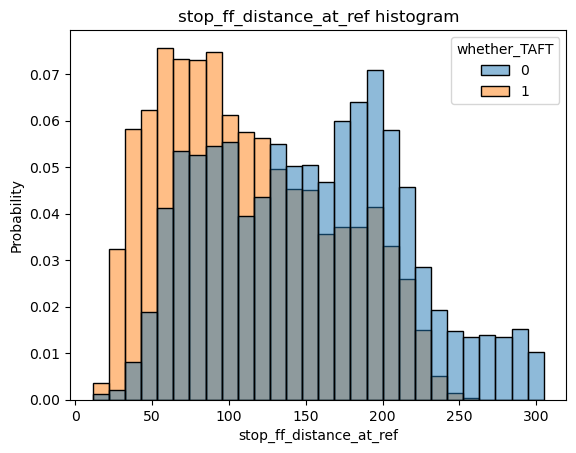

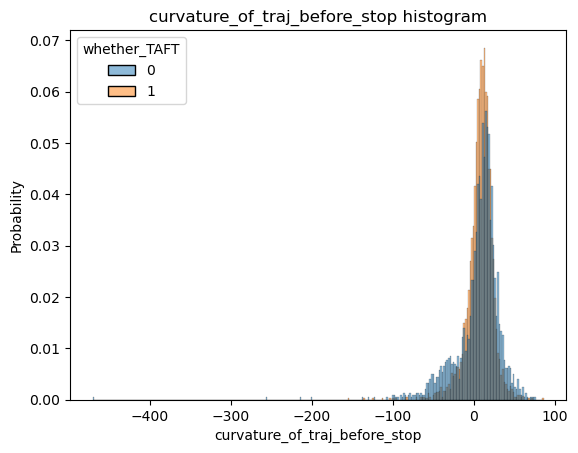

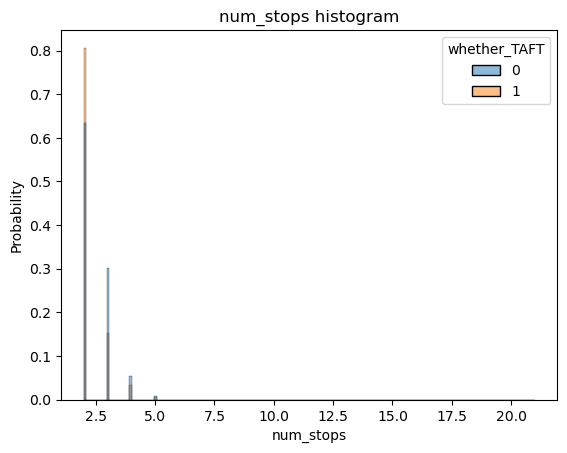

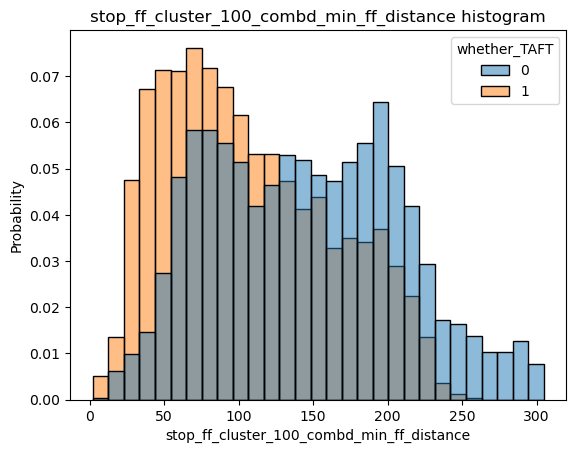

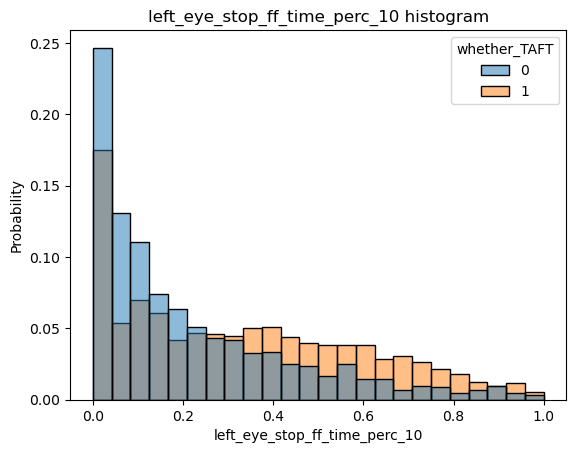

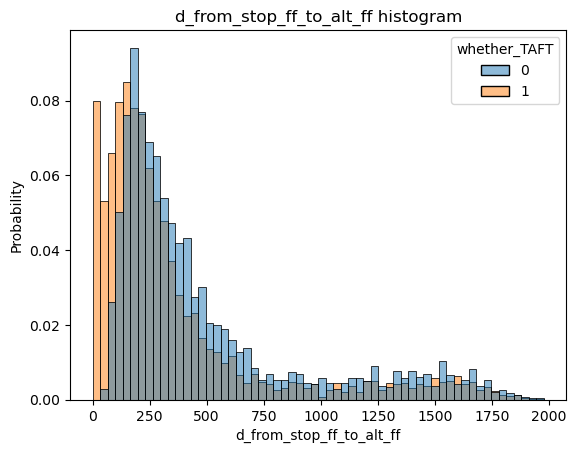

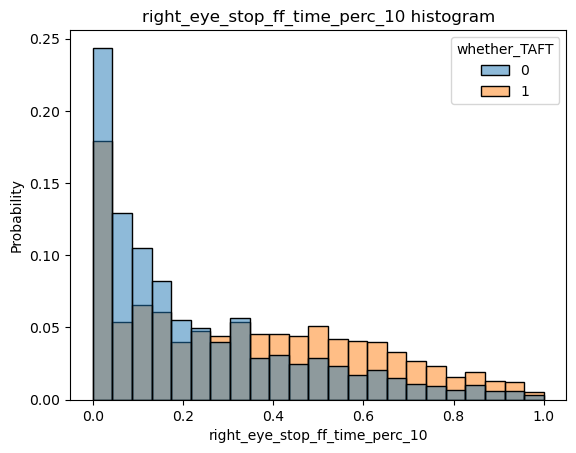

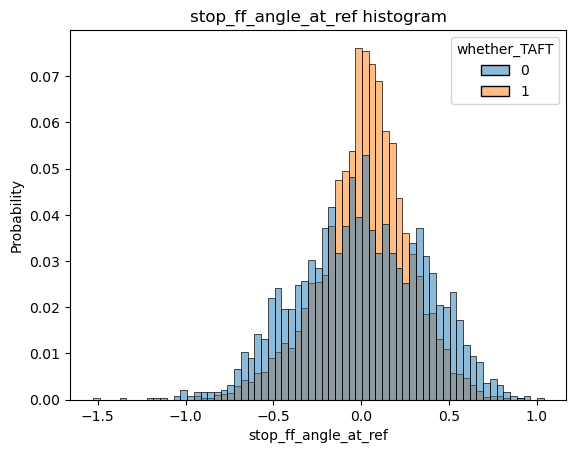

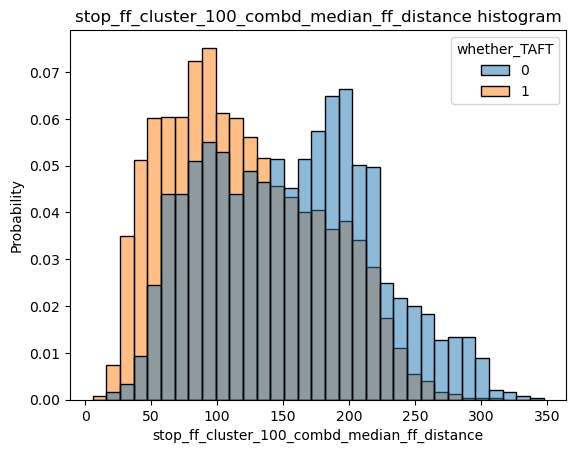

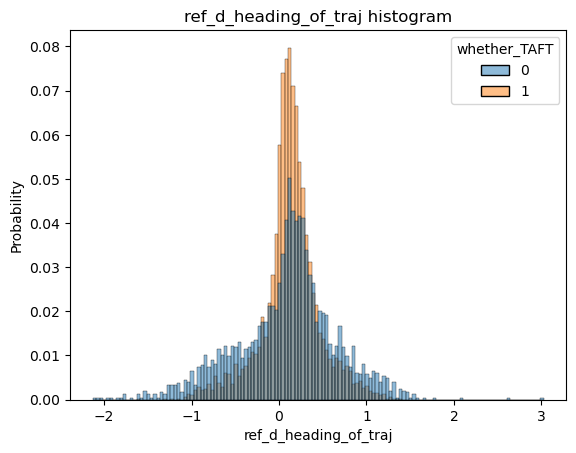

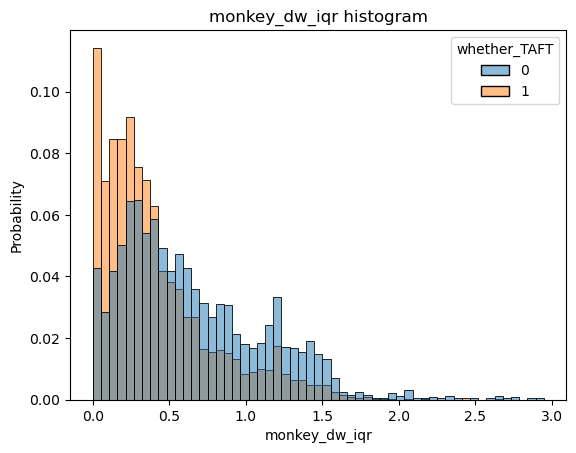

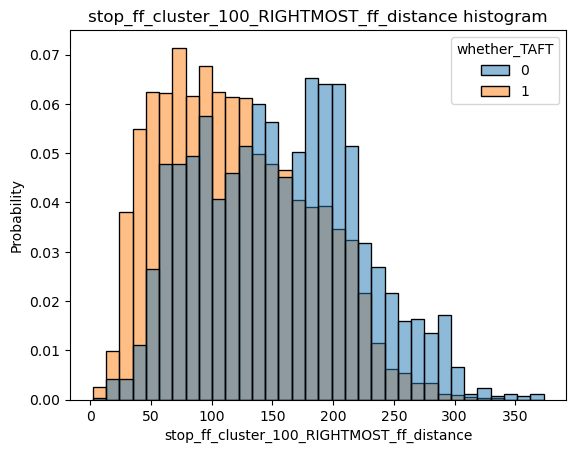

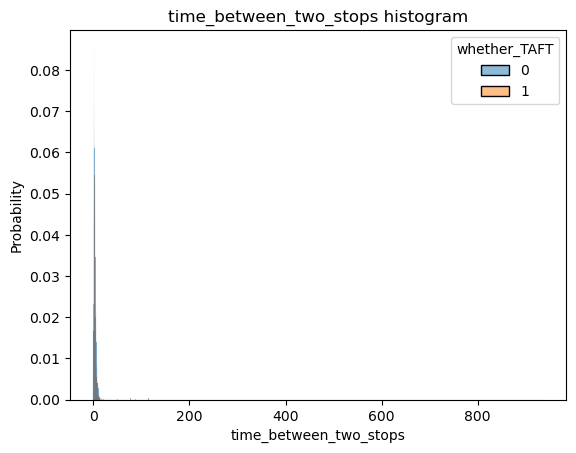

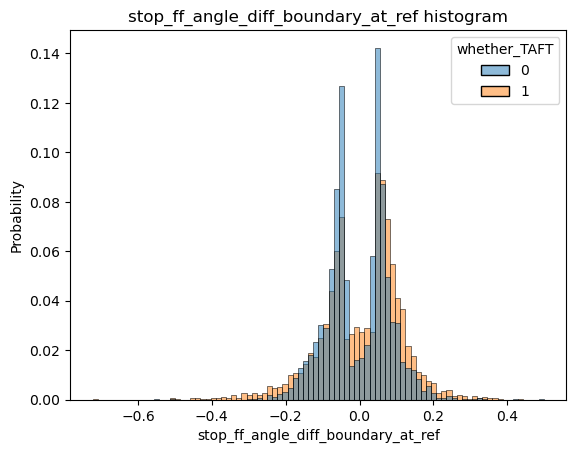

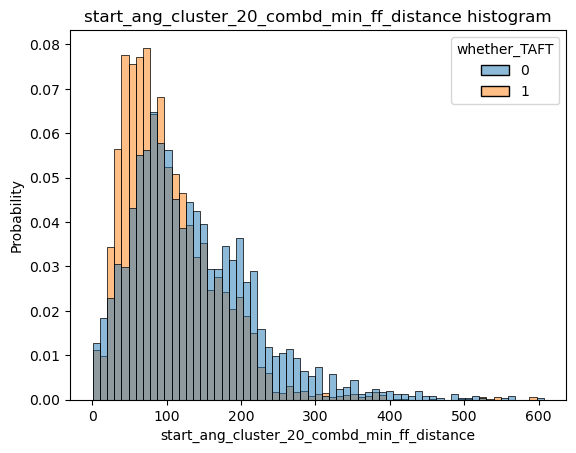

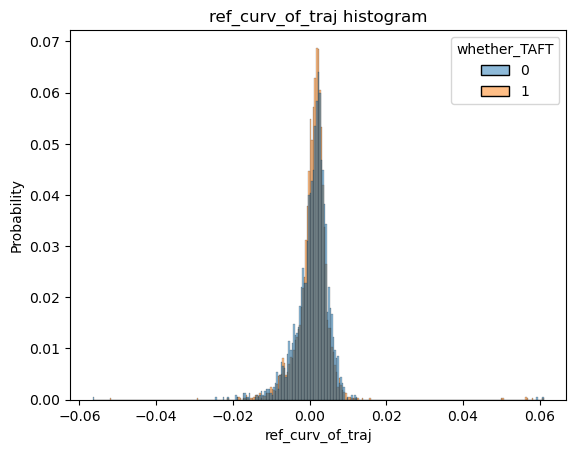

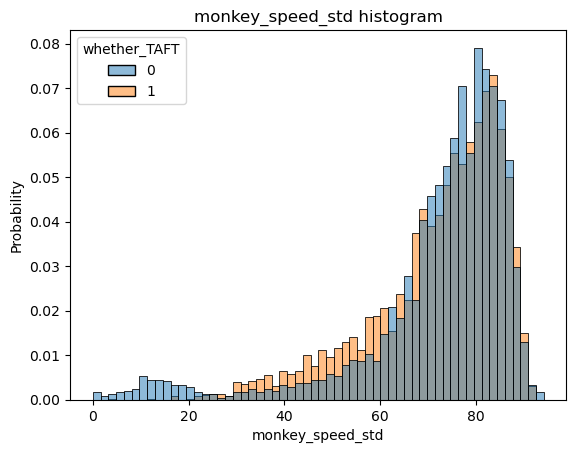

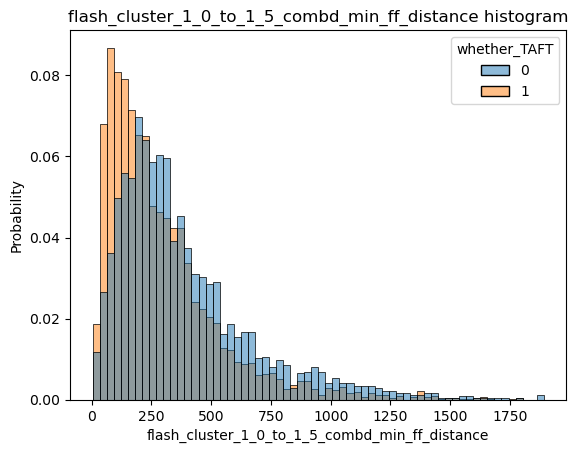

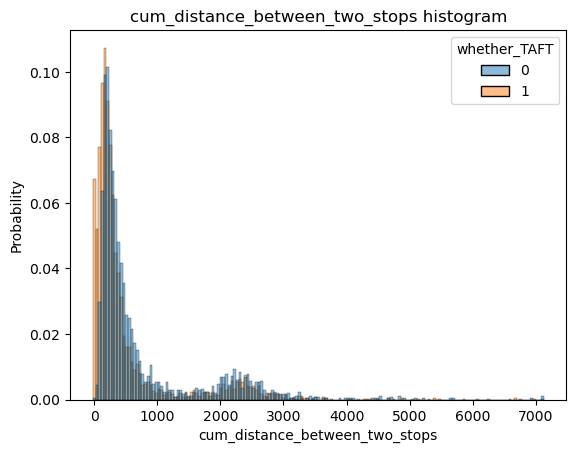

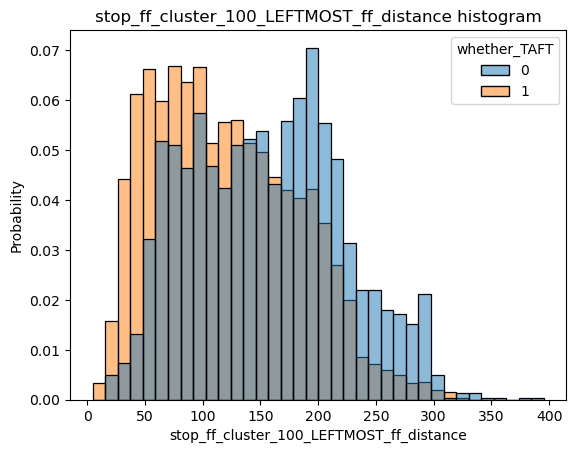

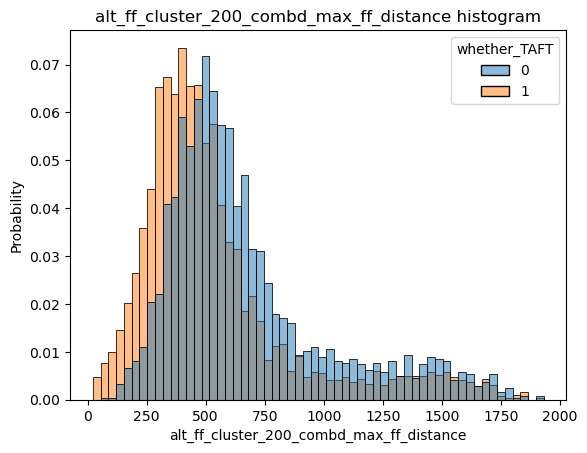

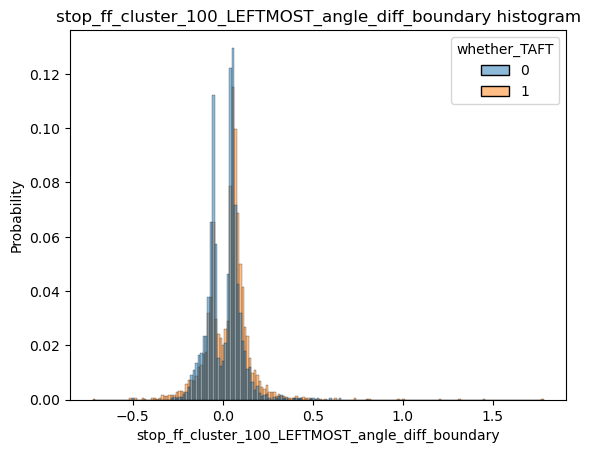

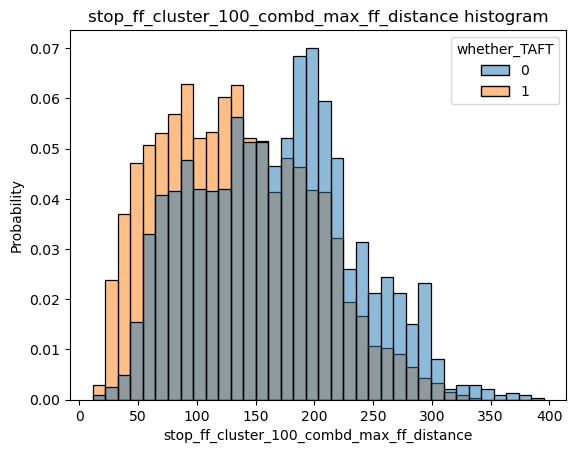

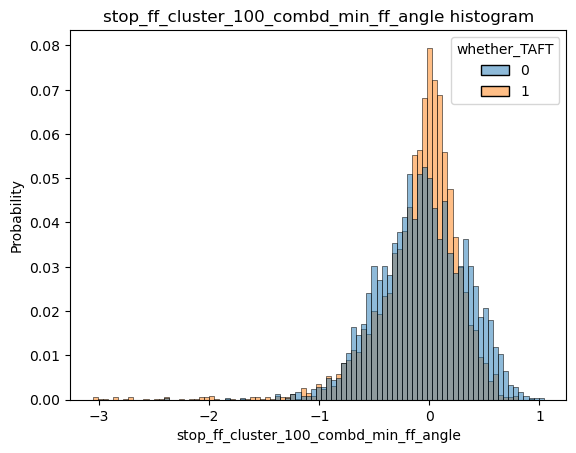

In [13]:
# for each feature in significant_features, plot the histogram of the feature for each class
for feature in significant_features['Feature']:
    sns.histplot(x=feature, data=both_df, stat='probability', kde=False, hue='whether_TAFT', common_norm=False)
    plt.title(f'{feature} histogram')
    plt.show()

### plot trials

In [43]:
GUAT_or_TAFT = 'GUAT'
list_of_stop_point_index = cgt.GUAT_x_df[cgt.GUAT_x_df['cur_ff_distance_at_ref'] > 150].stop_point_index.values

In [49]:
GUAT_or_TAFT = 'TAFT'
list_of_stop_point_index = cgt.TAFT_x_df[cgt.TAFT_x_df['cur_ff_distance_at_ref'] > 150].stop_point_index.values

In [53]:
sub = cgt.take_out_subsets_to_plot(list_of_stop_point_index, GUAT_or_TAFT)

cur_ff_distance_at_ref 210.803223852156
currentTrial: 10 num_trials: 1


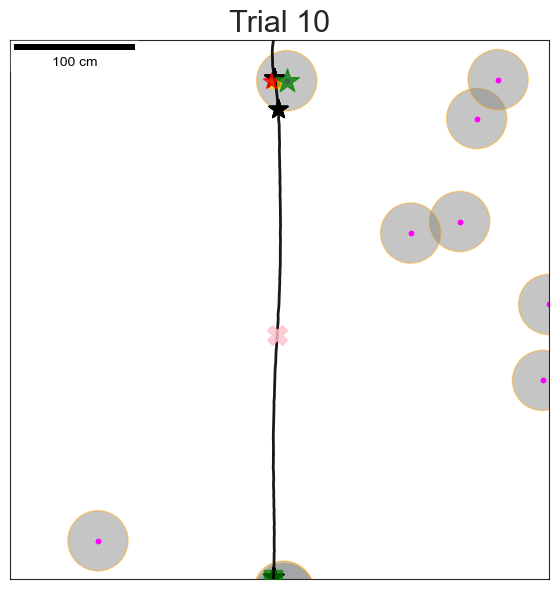

cur_ff_distance_at_ref 213.03446193469645
currentTrial: 69 num_trials: 2


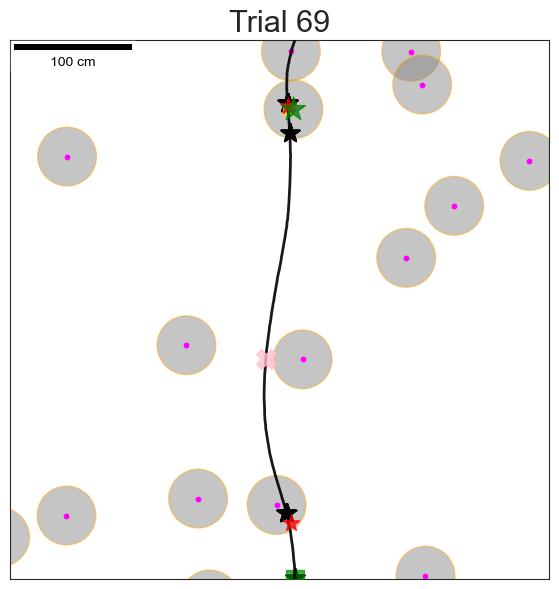

cur_ff_distance_at_ref 154.77700110438488
currentTrial: 72 num_trials: 4


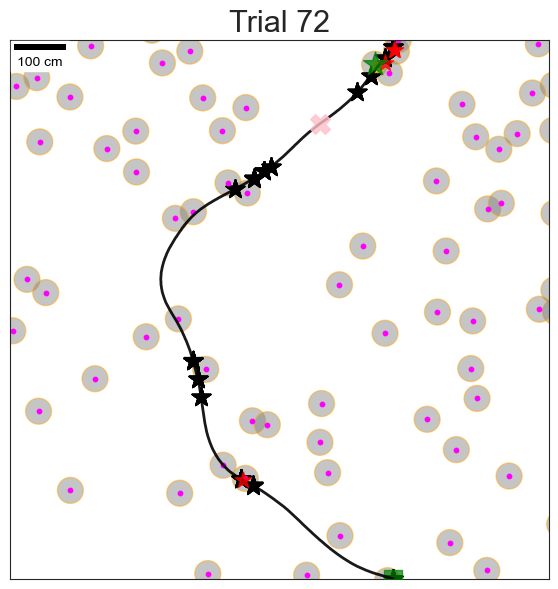

cur_ff_distance_at_ref 160.42953447917037
currentTrial: 74 num_trials: 2
duration[0] updated to 194.689438 to truncate the part of crossing arena edge


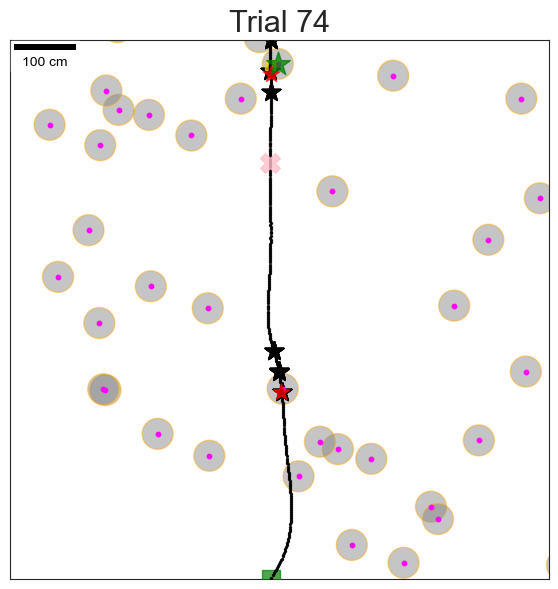

cur_ff_distance_at_ref 154.71364737033554
currentTrial: 76 num_trials: 2


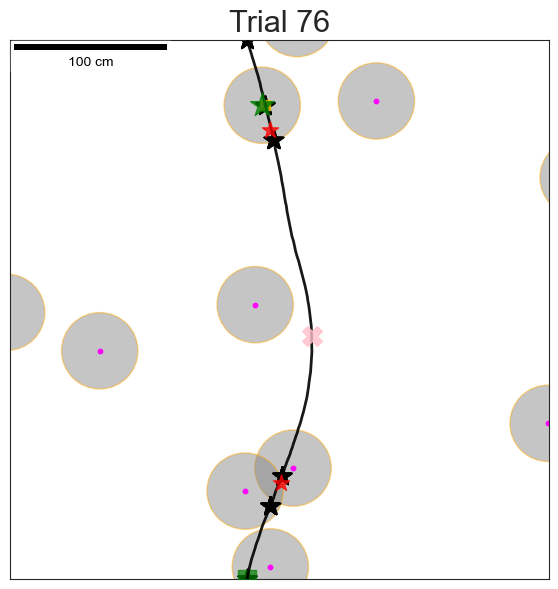

cur_ff_distance_at_ref 209.03588945229305
currentTrial: 77 num_trials: 2
duration[0] updated to 206.973209 to truncate the part of crossing arena edge


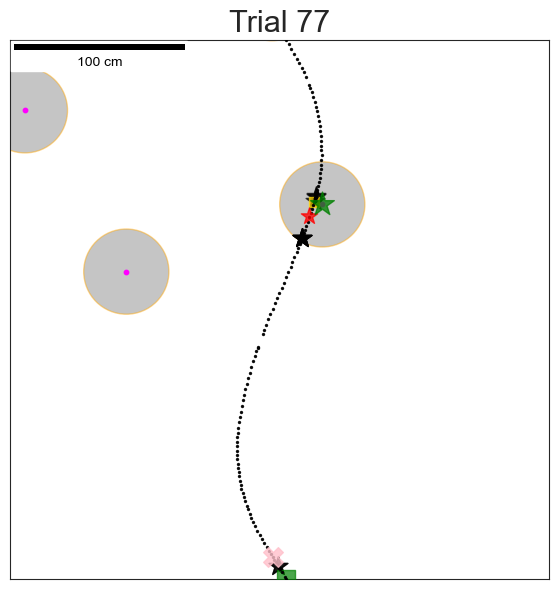

In [52]:
counter = 0
for i, row in sub.iterrows():
    if GUAT_or_TAFT == 'GUAT':
        ff_column = 'latest_visible_ff'
    else:
        ff_column = 'ff_index'

    print('cur_ff_distance_at_ref', row['cur_ff_distance_at_ref'])
    additional_kwargs = {'point_indices_to_be_marked': row['stop_point_index'],
                         'point_indices_to_be_marked_3rd_kind': row['ref_point_index']
                         }
    
    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp['indices_of_ff_to_mark'] = [row[ff_column]]
    trial = row['trial']
    duration = [cgt.ff_caught_T_new[trial-2], cgt.ff_caught_T_new[trial]+1]
    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,   
                **additional_kwargs          
                )
    plt.show()
    # process_GUAT_trials_class.ProcessGUATtrials.make_GUAT_plot(cgt, trial, [row[ff_column]], np.arange(row['stop_point_index']-200, row['stop_point_index']+300),
    #                                                            additional_kwargs=additional_kwargs)
    if counter == 5:
        break
    counter += 1

# Predict num stops

## gc_kwargs

In [7]:
gc_kwargs = helper_GUAT_vs_TAFT_class.gc_kwargs.copy()

## data from all sessions

In [9]:
gc_kwargs_temp = {**gc_kwargs,
                    'num_old_ff_per_row': 2,
                    'num_new_ff_per_row': 3}

gas = GUAT_combine_info_class.GUATCombineInfoAcrossSessions(gc_kwargs_temp, monkey_name='monkey_Schro')
gas.retrieve_or_make_combined_info(gc_kwargs_temp, combined_info_exists_ok=True, traj_df_exist_in_GUAT_store_ok=True)
gas.unpack_and_reload_combined_info_back_to_self(gas.combined_info, gas.all_traj_feature_names)

Retrieved: GUAT_nxt_ff_info
Retrieved: GUAT_cur_ff_info
Retrieved: traj_data_df
Retrieved: more_traj_data_df
Retrieved: more_ff_df
Retrieved: traj_ff_info


## data from one session

In [6]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330'
gcc = GUAT_collect_info_class.GUATCollectInfoForSession(raw_data_folder_path=raw_data_folder_path, 
                                                        gc_kwargs=gc_kwargs, new_point_index_start=0)
_ = gcc.streamline_process_to_collect_info_from_one_session(GUAT_w_ff_df_exists_ok=True,
                                                            GUAT_info_exists_ok=False)

gas = GUAT_combine_info_class.GUATCombineInfoAcrossSessions(gc_kwargs)
gas.unpack_and_reload_combined_info_back_to_self(gcc.important_info, gcc.all_traj_feature_names)

In [ ]:
# get the frequency of each element in the numpy array gas.output
unique_elements, counts_elements = np.unique(gas.output, return_counts=True)
unique_elements, counts_elements

## ML

### use current data


 input features: ['duration_of_last_vis_period_0'
 'distance_from_monkey_now_to_monkey_when_ff_last_seen_0'
 'abs_curv_diff_0' 'ff_angle_0' 'last_seen_ff_distance_0'
 'last_seen_curv_diff_0' 'last_seen_ff_angle_0' 'curv_diff_0'
 'ff_distance_0' 'time_since_last_vis_0' 'time_till_next_visible_0'
 'angle_from_monkey_now_to_monkey_when_ff_last_seen_0'
 'duration_of_last_vis_period_1'
 'distance_from_monkey_now_to_monkey_when_ff_last_seen_1'
 'abs_curv_diff_1' 'ff_angle_1' 'last_seen_ff_distance_1'
 'last_seen_curv_diff_1' 'last_seen_ff_angle_1' 'curv_diff_1'
 'ff_distance_1' 'time_since_last_vis_1' 'time_till_next_visible_1'
 'angle_from_monkey_now_to_monkey_when_ff_last_seen_1'
 'duration_of_last_vis_period_2'
 'distance_from_monkey_now_to_monkey_when_ff_last_seen_2'
 'abs_curv_diff_2' 'ff_angle_2' 'last_seen_ff_distance_2'
 'last_seen_curv_diff_2' 'last_seen_ff_angle_2' 'curv_diff_2'
 'ff_distance_2' 'time_since_last_vis_2' 'time_till_next_visible_2'
 'angle_from_monkey_now_to_monkey_w

/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: dt
model: bagging
model: boosting


/opt/anaconda3/envs/ff_venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


model: grad_boosting
model: rf
model: svm
           model  accuracy
5  grad_boosting   0.73760
3        bagging   0.72320
6             rf   0.71360
7            svm   0.70720
1         logreg   0.70400
2             dt   0.62080
4       boosting   0.56160
0            gnb   0.30080


The model with the highest accuracy is: GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=7,
                           n_estimators=500, subsample=0.5) !!
chosen model accuracy: 0.7376
chosen model confusion matrix: [[404  13   0   0   0   2   0   1   2   0]
 [ 88  57   2   0   2   1   1   1   1   1]
 [ 22  13   0   0   0   0   0   0   0   0]
 [  6   7   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0

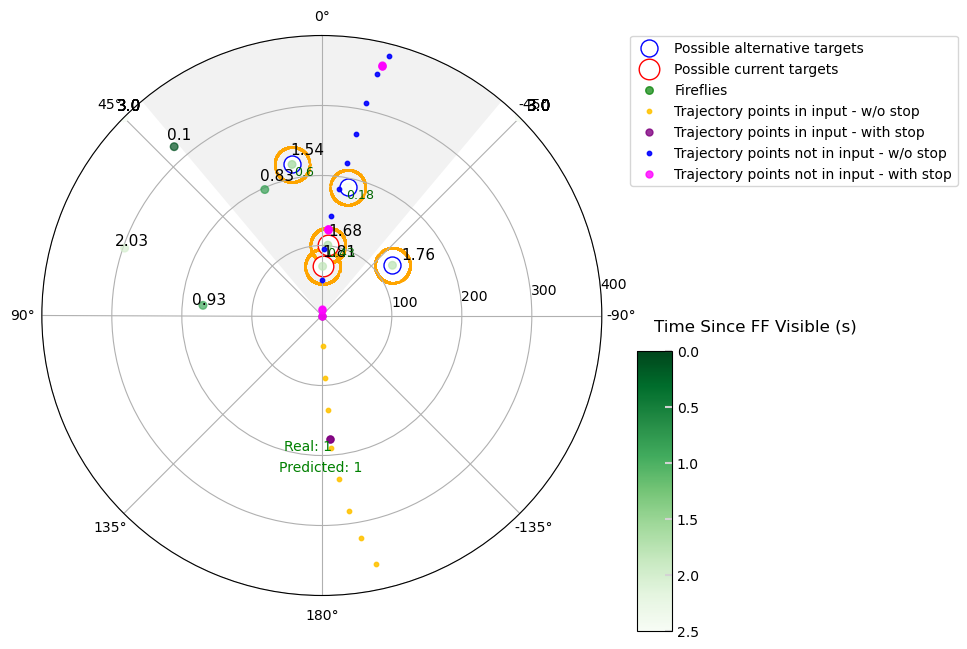

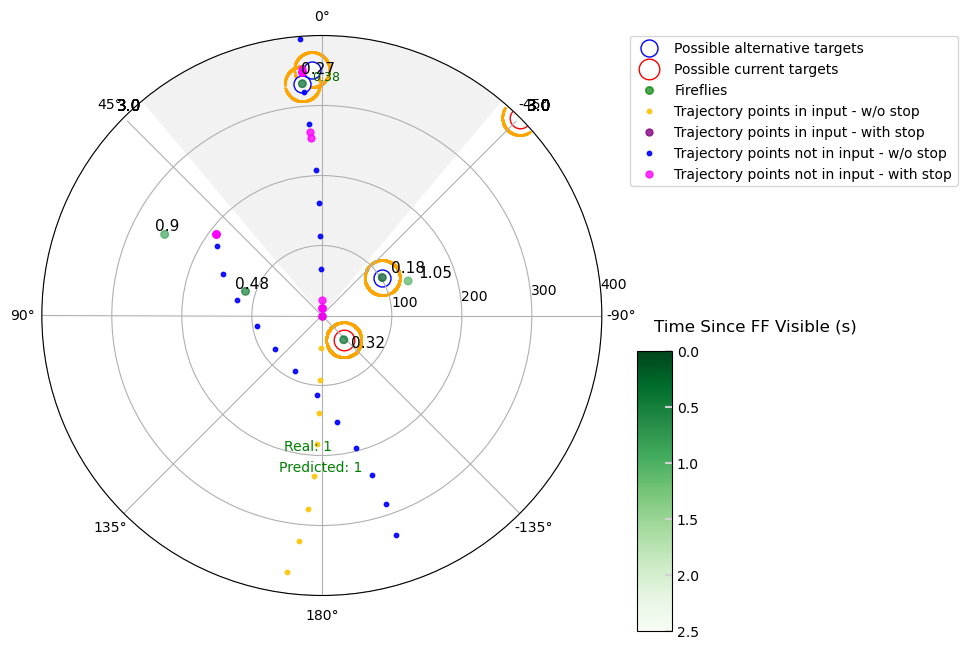

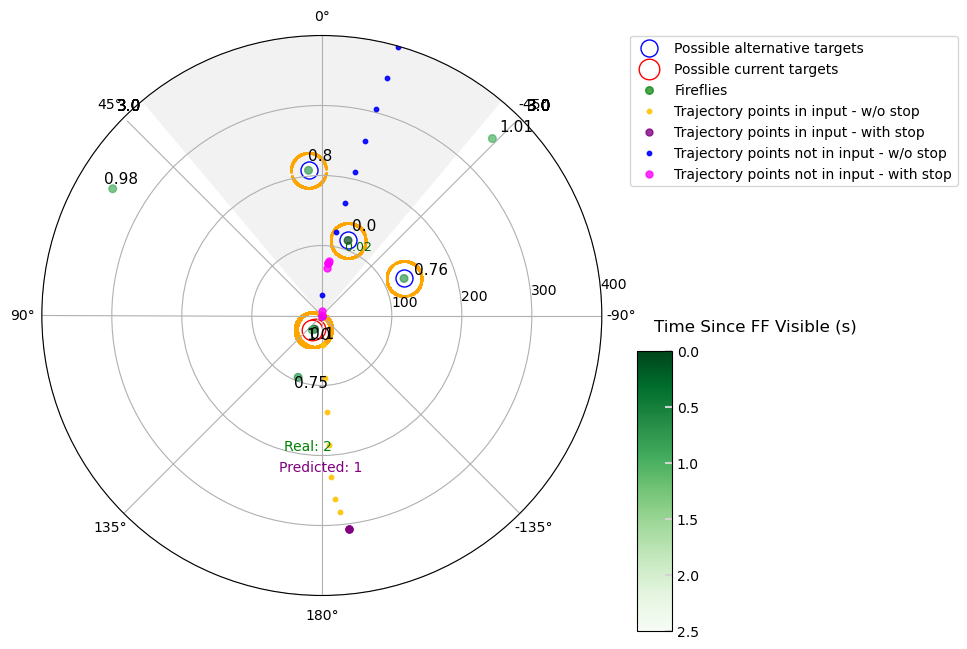

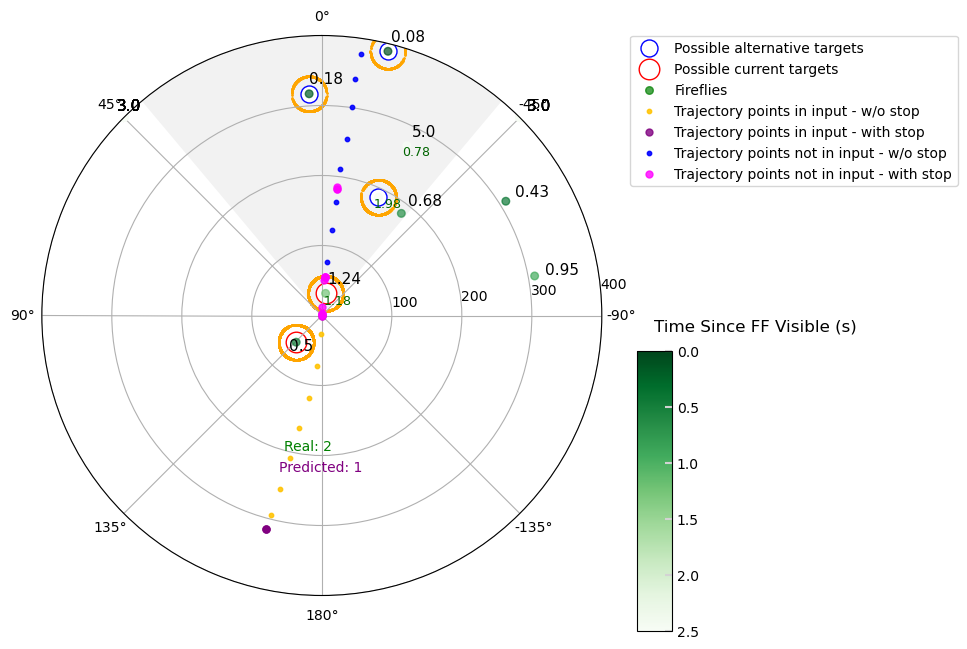

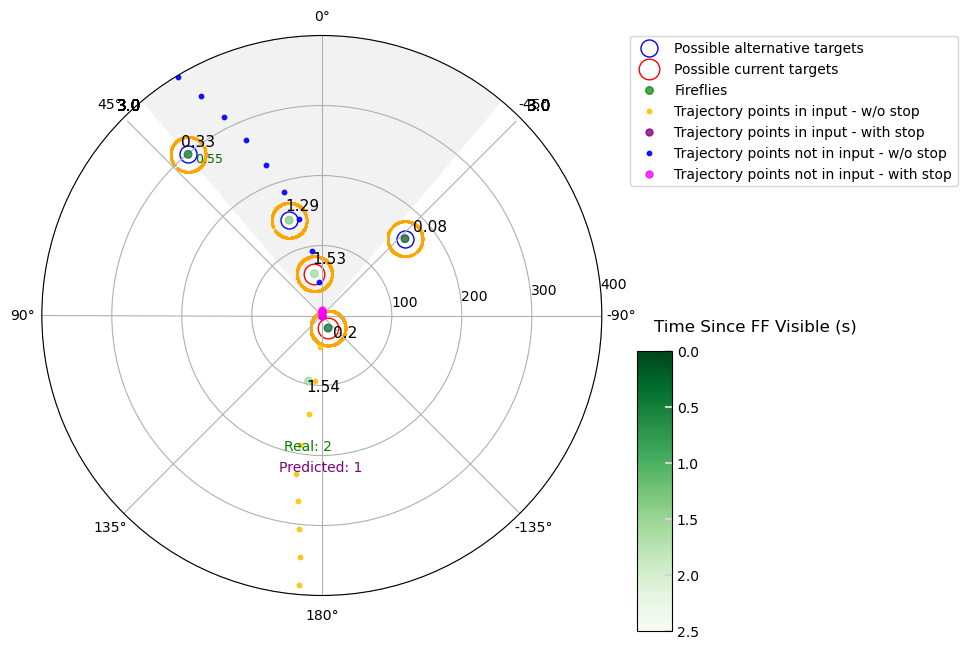

In [10]:
gas.process_current_and_alternative_ff_info()
more_ff_attributes = ['ff_distance', 'ff_angle', 'curv_diff']
ff_last_seen_attributes = ['last_seen_' + attribute for attribute in more_ff_attributes] + ['distance_from_monkey_now_to_monkey_when_ff_last_seen', 'angle_from_monkey_now_to_monkey_when_ff_last_seen']
ff_next_seen_attributes = ['next_seen_' + attribute for attribute in more_ff_attributes] + ['distance_from_monkey_now_to_monkey_when_ff_next_seen', 'angle_from_monkey_now_to_monkey_when_ff_next_seen']


gas.find_input_and_output(add_arc_info=True, add_current_curv_of_traj=True, 
                          ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis', 'time_till_next_visible', 'duration_of_last_vis_period']
                          + ff_last_seen_attributes)

gas.prepare_data_for_machine_learning(traj_ff_attributes_to_add=None)
gas.split_data_to_train_and_test(scaling_data=True)

#bagging = BaggingClassifier(n_estimators=200, max_features=0.9, bootstrap_features=True, bootstrap=True, random_state=42)
#gas.use_machine_learning_model(model=bagging) 

gas.use_machine_learning_model(model=None) #MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, activation='relu', solver='adam', random_state=1))

gas.get_pred_results_df()  
gas.add_additional_info_to_plot()
gas.plot_prediction_results(max_plot_to_make=5, show_reward_boundary=True, use_more_ff_inputs=True, use_more_traj_points=True,
                            predict_num_stops=True,
                            )

In [36]:
len(gas.num_stops[gas.num_stops==1])/len(gas.num_stops)

0.5649929610511497

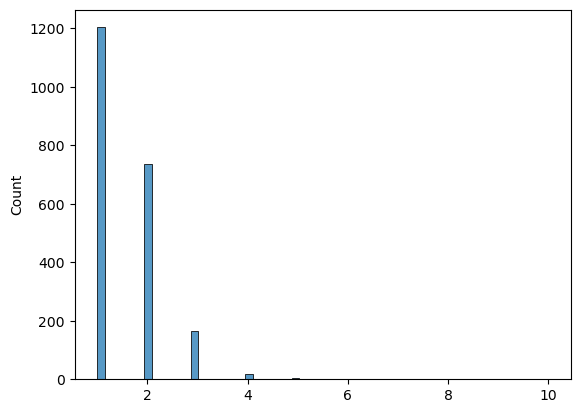

In [34]:
sns.histplot(gas.num_stops)
plt.show()

In [485]:
current_i = 0
max_plot_to_make = 20

In [ ]:

selected_cases = np.arange(current_i, current_i+max_plot_to_make)
gas.plot_prediction_results(selected_cases=selected_cases, 
                            max_plot_to_make=max_plot_to_make, 
                            show_reward_boundary=True, 
                            use_more_ff_inputs=True, 
                            use_more_traj_points=True,
                            predict_num_stops=True)
current_i += max_plot_to_make

In [ ]:
gas.use_machine_learning_model(model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000))   
gas.get_pred_results_df()  

### loop through num_ff

In [ ]:
# loop
for num_old_ff_per_row in [1, 2, 3]:
    for num_new_ff_per_row in [1, 2, 3]:
        print('num_old_ff_per_row:', num_old_ff_per_row)
        print('num_new_ff_per_row:', num_new_ff_per_row)

        gc_kwargs_temp = {**gc_kwargs,
                            'num_old_ff_per_row': num_old_ff_per_row,
                            'num_new_ff_per_row': num_new_ff_per_row}

        gas = GUAT_combine_info_class.GUATCombineInfoAcrossSessions(gc_kwargs_temp)
        gas.retrieve_or_make_combined_info(gc_kwargs_temp, combined_info_exists_ok=True, traj_df_exist_in_GUAT_store_ok=True)
        gas.unpack_and_reload_combined_info_back_to_self(gas.combined_info, gas.all_traj_feature_names)


        gas.process_current_and_alternative_ff_info()
        more_ff_attributes = ['ff_distance', 'ff_angle', 'curv_diff']
        ff_last_seen_attributes = ['last_seen_' + attribute for attribute in more_ff_attributes] + ['distance_from_monkey_now_to_monkey_when_ff_last_seen', 'angle_from_monkey_now_to_monkey_when_ff_last_seen']
        ff_next_seen_attributes = ['next_seen_' + attribute for attribute in more_ff_attributes] + ['distance_from_monkey_now_to_monkey_when_ff_next_seen', 'angle_from_monkey_now_to_monkey_when_ff_next_seen']


        gas.find_input_and_output(add_arc_info=True, add_current_curv_of_traj=True, 
                                ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis', 'time_till_next_visible', 'duration_of_last_vis_period']
                                + ff_last_seen_attributes)

        gas.prepare_data_for_machine_learning(traj_ff_attributes_to_add=None)
        gas.split_data_to_train_and_test(scaling_data=True)
        gas.use_machine_learning_model(model=None) #MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, activation='relu', solver='adam', random_state=1))

        gas.get_pred_results_df()  


# Basic data

## Retrieve monkey data

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
PLAYER = "monkey"
trial_total_num = 2

monkey_name = raw_data_folder_path.split('/')[2]
data_name = raw_data_folder_path.split('/')[3]

data_item = animation_class.AnimationClass(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.PlotTrials_args()
data_item.make_or_retrieve_target_clust_last_vis_df()

monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe
ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
ff_caught_T_new = data_item.ff_caught_T_new
ff_flash_sorted = data_item.ff_flash_sorted
PlotTrials_args = data_item.PlotTrials_args

target_clust_last_vis_df = data_item.target_clust_last_vis_df
target_clust_last_vis_df['ff_index'] = target_clust_last_vis_df['target_index']


## plotting kwargs

In [ ]:
classic_plot_kwargs = {'player': PLAYER,
                       'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True,
                       'show_eye_positions': True,
                       'show_eye_positions_on_the_right': True,
                       'show_connect_path_eye_positions': True,
                       #=== below is different from animation_plot_kwargs
                       'hitting_arena_edge_ok': False,
                       'trial_too_short_ok': False}

combined_plot_kwargs = {'player': PLAYER,
                        'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}

pretty_null_arc_plot_kwargs = {'player': 'monkey',
        'show_believed_target_positions': True,                       
        'show_stops': True,
        'show_reward_boundary': True,
        'show_scale_bar': True,
        'hitting_arena_edge_ok': True,
        'trial_too_short_ok': True,
        'show_alive_fireflies': False,
        'adjust_xy_limits': True,
        'zoom_in': True,
        'minimal_margin': 60,
        }

animation_plot_kwargs = {
    **classic_plot_kwargs,
    'as_part_of_animation': True,
    'show_eye_positions_on_the_right': False,
    'hitting_arena_edge_ok': True,
    'trial_too_short_ok': True,
    'images_dir': None
}

data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)

## best_arc_df

In [ ]:
ff_dataframe_sub = ff_dataframe[ff_dataframe['ff_angle'].between(-np.pi/4, np.pi/4, inclusive='neither')].copy()
curv = curvature_class.CurvatureOfPath(ff_dataframe_sub, monkey_information, ff_caught_T_new, ff_real_position_sorted,
                                       )
curv.make_curvature_df([-25, 25], curv_of_traj_mode='distance', include_cntr_arc_curv=True,
                       include_opt_arc_curv=True,
                       opt_arc_stop_first_vis_bdry=False,
                       ignore_error=False,)
curvature_df = curv.curvature_df.copy()
curv.find_opt_arc_info_from_curvature_df()

In [ ]:
curv.make_best_arc_df()
curv.get_elements_for_plotting(opt_arc_stop_first_vis_bdry=False, ignore_error=True)
#curv.add_column_monkey_passed_by_to_best_arc_df()

best_arc_df = curv.best_arc_df.copy()
curvature_df = curv.curvature_df.copy()

pseudo_manual_anno, pseudo_manual_anno_long = decision_making_utils.make_pseudo_manual_anno(best_arc_df, monkey_information, ff_caught_T_new)

## combine curvature_df with ff_dataframe

In [ ]:
# combine curvature_df with ff_dataframe so that one can add columns like 'abs_curv_diff' to ff_dataframe
curvature_df_sub = curv.curvature_df[['ff_index', 'point_index', 'curv_diff']]
if 'curv_diff' in ff_dataframe.columns:
    ff_dataframe.drop('curv_diff', axis=1, inplace=True)
ff_dataframe = pd.merge(ff_dataframe, curvature_df_sub, on=['ff_index', 'point_index'], how='left')
# fill na of curv_diff, but randomly make half of them negative
na_index = ff_dataframe['curv_diff'].isna()
ff_dataframe.loc[na_index, 'curv_diff'] = np.random.choice([-1,1], size= na_index.sum()) * 0.6
ff_dataframe['abs_curv_diff']  = ff_dataframe['curv_diff'].abs()

## null_arc_info_for_plotting

In [ ]:
reload(show_null_trajectory)
null_arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(best_arc_df, monkey_information, column_for_color=None, ignore_error=True)
#null_arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(best_arc_df, monkey_information, column_for_color='diff_percentile_in_decimal')

# also get null_arc_to_center_info_for_plotting
all_point_index = best_arc_df.point_index.values
all_ff_index = best_arc_df.ff_index.values
remaining_index_of_array, remaining_all_ff_index, remaining_all_point_index = show_null_trajectory.eliminate_invalid_ff_for_null_arc(all_ff_index, all_point_index, ff_real_position_sorted, monkey_information)
null_arc_to_center_info_for_plotting = show_null_trajectory.find_and_package_arc_to_center_info_for_plotting(remaining_all_point_index, remaining_all_ff_index, monkey_information, ff_real_position_sorted,
                                                                                                             ignore_error=True)

# Visualization

## plotly

In [ ]:
for i in [1, 3, 7, 8, 14]:
    print(i)
    current_plotly_polar_plot_kargs, all_ff_dict = plotly_utils_polar.prepare_to_make_one_plotly_polar_plot(i, gas.polar_plots_kwargs, gas.point_index_to_plot, gas.GUAT_joined_ff_info, gas.all_traj_feature_names, 
                                                                                                            more_ff_df=gas.more_ff_df, trajectory_features=gc_kwargs['trajectory_features'])

    fig, customdata_columns = plotly_utils_polar.make_one_plotly_polar_plot(**current_plotly_polar_plot_kargs,
                                                        symbol='group', color='time_since_last_vis', 
                                                        columns_for_annotation=['subgroup', 'curv_diff', 'time_till_next_visible', 'time_since_last_vis'],)
                                                        #columns_for_annotation=['subgroup', 'ff_number', 'group', 'curv_diff'],)
    print(all_ff_dict['more_monkey_info_for_ff_in_past_or_future'])
    fig.show()

## dash

In [ ]:
from dash import Dash, html, dcc, Input, Output, callback
from dash.exceptions import PreventUpdate
import pandas as pd
import plotly.express as px
reload(plotly_utils_polar)
def use_dash(i, gas):
    current_plotly_polar_plot_kargs, all_ff_dict = plotly_utils_polar.prepare_to_make_one_plotly_polar_plot(i, gas.polar_plots_kwargs, gas.point_index_to_plot, gas.GUAT_joined_ff_info, gas.all_traj_feature_names, 
                                                                                            more_ff_df=gas.more_ff_df, trajectory_features=gas.trajectory_features,)
    fig, customdata_columns = plotly_utils_polar.make_one_plotly_polar_plot(**current_plotly_polar_plot_kargs, columns_for_annotation=['subgroup', 'curv_diff', 'time_since_last_vis', 'time_till_next_visible'], 
                                                                            additional_customdata_columns=['ff_number'], color='group')
    initial_hover_data = current_plotly_polar_plot_kargs['ff_df'][customdata_columns].iloc[0].values
    ff_number_index = np.where(np.array(customdata_columns) == 'ff_number')[0][0]

    external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
    df = all_ff_dict['combined_ff_df'].copy()

    app = Dash(__name__, external_stylesheets=external_stylesheets)

    app.layout = html.Div([

        html.Div([
            dcc.Graph(
                id='main_graph',
                figure = fig,
                hoverData={'points': [{'customdata': initial_hover_data}]} #['Original-Present', 0]}]}
            )
        ], style={'width': '50%', 'display': 'inline-block', 'padding': '0 0'}),
        html.Div([
            dcc.Graph(id='ff_history'),
        ], style={'display': 'inline-block', 'width': '50%'}),
    ])



    @callback(
        Output('ff_history', 'figure'),
        Input('main_graph', 'hoverData'))
    def update_ff_history(hoverData):
        print('hoverData:', hoverData)
        print('hoverData[points][0]:', hoverData['points'][0])
        current_ff_number = hoverData['points'][0]['customdata'][ff_number_index]
        # if current_ff_number is not int
        if not isinstance(current_ff_number, int):
            raise PreventUpdate
        else:
            dff = df[df['ff_number'] == current_ff_number]
            current_group = dff['group'].iloc[0]
            symbol_maps_for_groups = {'Original': 'circle-dot', 'Alternative': 'star-dot', 'More': 'diamond-dot'}

            title = '<b>{}</b>'.format(current_ff_number)
            current_plotly_polar_plot_kargs_temp = current_plotly_polar_plot_kargs.copy()
            current_plotly_polar_plot_kargs_temp['ff_df'] = dff.copy()
            fig, customdata_columns = plotly_utils_polar.make_one_plotly_polar_plot(**current_plotly_polar_plot_kargs_temp,
                                                                columns_for_annotation=['subgroup', 'ff_distance', 'ff_angle', 'curv_diff', 'time_since_last_vis', 'time_till_next_visible'],
                                                                add_colorbar=True, add_legend=True, add_real_and_predicted_labels=False, size=None,
                                                                size_max=15, symbol='time_label', symbol_map={'Present':symbol_maps_for_groups[current_group]})
            return fig

    app.run(debug=True)
    return 

In [ ]:
use_dash(1, gas)

In [ ]:
use_dash(3, gas)

In [ ]:
use_dash(7, gas)

## Other important distributions

### histplot of durations between stops

In [ ]:
# plot the duration of the three stops
diff_stop_time = GUAT_cluster_df['last_stop_time'] - GUAT_cluster_df['first_stop_time']
sns.histplot(diff_stop_time, bins=20)
plt.show()


# make a line plot of 3 points on x-axis, with y-axis being time since first stop


### histplot of time_till_next_visible

In [ ]:
## histplot of durations between stops

In [ ]:
sns.histplot(gcc.GUAT_cur_ff_info['time_till_next_visible'], bins=20, stat='probability')
plt.title('time till next visible')
plt.show()

### curvature upper lower bounds

In [ ]:
# see clean_curvature_info function

In [ ]:
max(curvature_df.curv_diff.values)

In [ ]:
curv = curvature_class.CurvatureOfPath(ff_dataframe, monkey_information, ff_caught_T_new, ff_real_position_sorted)
curv.make_curvature_df([-1, 1])
curv.find_opt_arc_info_from_curvature_df()
curv.make_best_arc_df()
curv.get_elements_for_plotting()

best_arc_df = curv.best_arc_df.copy()
curvature_df = curv.curvature_df.copy()

In [ ]:
for column in ['curv_of_traj', 'curvature_lower_bound', 'curvature_upper_bound', 'opt_arc_curv']:
    sns.boxplot(curvature_df[column].values, orient='h')
    plt.title(column)
    plt.show()
    
   
    sns.histplot(curvature_df[column].values, bins=50)
    plt.title(column)
    plt.show()
    

# Machine learning prediction

## dm_free_selection

In [ ]:
## if I want to use manual_anno for GUAT_item
# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information)
# 
# manual_anno = dm.manual_anno

In [ ]:

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
                                          time_range_of_trajectory=[-1.5, 1.5], num_time_points_for_trajectory=20)

#dm.retrieve_manual_anno()
dm.retrieve_manual_anno()

#dm.manual_anno = pseudo_manual_anno

dm.separate_manual_anno()
dm.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???

#dm.get_free_selection_x(ff_attributes=['ff_distance'])
dm.get_free_selection_x(add_arc_info=True, add_current_curv_of_traj=True, ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis'], curvature_df=curv2.curvature_df.copy(), 
                           curv_of_traj_df=curv_of_traj_df.copy(), ff_caught_T_new=ff_caught_T_new, 
                          selection_criterion_if_too_many_ff='abs_ff_angle')
#dm.get_free_selection_x(num_ff_per_row=7)
dm.prepare_data_for_machine_learning(kind="free selection", furnish_with_trajectory_data=True, trajectory_data_kind="position", ) 
dm.split_data_to_train_and_test(scaling_data=True)

dm.use_machine_learning_model(model=None)   
dm.get_pred_results_df()  
dm.plot_prediction_results(max_plot_to_make=3)

In [ ]:
dm.plot_prediction_results(max_plot_to_make=100)

## dm_replacement

In [ ]:

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
                                          time_range_of_trajectory=[-0.8, 0.8], num_time_points_for_trajectory=8)

dm.retrieve_manual_anno()

dm.manual_anno = pseudo_manual_anno

dm.separate_manual_anno()
dm.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???


dm.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = [], replacement_inputs_format='old_plus_diff_between_old_and_new',
                        ff_caught_T_new=ff_caught_T_new,
                        non_chosen_ff_selection_criterion='abs_curv_diff')
# dm.get_replacement_x_df()

dm.prepare_data_for_machine_learning(kind="replacement", furnish_with_trajectory_data=False, trajectory_data_kind="position",
                                     ) 
dm.split_data_to_train_and_test(scaling_data=True)
dm.use_machine_learning_model(model=None)   
dm.get_pred_results_df()  
dm.plot_prediction_results(max_plot_to_make=3)


## plot wrong predictions

In [ ]:
dm.plot_prediction_results(selected_cases=dm.wrong_predictions[:3], PlotTrials_args=PlotTrials_args)

## moit

In [ ]:
ff_dataframe_temp = ff_dataframe.copy()
# eliminate ff that has abs(ff_angle) greater than 45 degrees
ff_dataframe_temp = ff_dataframe_temp[abs(ff_dataframe_temp['ff_angle_boundary']) <= math.pi/4]
ff_dataframe_truncated = ff_dataframe_temp[ff_dataframe_temp['time_since_last_vis'] <= 2.5]


time_range_of_trajectory=[-0.8, 0]
moit = intended_targets_classes.ModelOfIntendedTargets(ff_dataframe_truncated, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                       time_range_of_trajectory=time_range_of_trajectory)

# moit.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary=0.5)

moit.manual_anno = pseudo_manual_anno
moit.manual_anno_long = pseudo_manual_anno_long
moit.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary=0.5)

moit.get_input_data(num_ff_per_row=5, keeping_1_out_of_n_rows=10,
                   add_arc_info=True, add_current_curv_of_traj=True,
                   curvature_df=curv2.curvature_df.copy(),
                   curv_of_traj_df=curv2.curv_of_traj_df.copy(),
                   #ff_attributes=[])
                   ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis'],
                   ff_caught_T_new=ff_caught_T_new)

moit.prepare_data_for_machine_learning(furnish_with_trajectory_data=False, trajectory_data_kind="position")
#moit.turn_y_label_into_multi_class(manual_anno_mul = None, allow_multi_label = False)
moit.split_data_to_train_and_test(scaling_data=True, keep_whole_chunks=False)
moit.use_machine_learning_model(model=None)
moit.get_pred_results_df()
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[:3], PlotTrials_args=PlotTrials_args)

## cr (cluster replacement)

In [ ]:
reload(decision_making_utils)
reload(decision_making_class)
reload(intended_targets_classes)
reload(specific_utils)
reload(cluster_replacement_utils)
reload(cluster_replacement_class)

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
cr = cluster_replacement_class.ClusterReplacement(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_life_sorted,
                                          time_range_of_trajectory=[-0.8, 0.8], num_time_points_for_trajectory=8)
cr.retrieve_manual_anno()
#cr.manual_anno = pseudo_manual_anno
cr.separate_manual_anno()
cr.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???

cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = [], replacement_inputs_format='old_plus_diff_between_old_and_new',
                        ff_caught_T_new=ff_caught_T_new, 
                        non_chosen_ff_selection_criterion='abs_curv_diff')
# cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], replacement_inputs_format='diff_between_old_and_new',
#                         ff_caught_T_new=ff_caught_T_new, )
cr.find_input_and_output_for_cluster_replacement()
cr.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position")

cr.split_data_to_train_and_test(scaling_data=True)
cr.use_machine_learning_model(model=None)
cr.get_pred_results_df()

cr.plot_prediction_results(max_plot_to_make=5, show_direction_of_monkey_on_trajectory=True, show_reward_boundary=True)


In [ ]:
cr.plot_prediction_results(selected_cases=range(50,60), show_direction_of_monkey_on_trajectory=True, show_reward_boundary=True)


## experiment

### with arc info

In [ ]:
reload(decision_making_utils)
reload(decision_making_class)
reload(intended_targets_classes)
reload(specific_utils)
reload(cluster_replacement_utils)
reload(cluster_replacement_class)

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
cr = cluster_replacement_class.ClusterReplacement(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_life_sorted,
                                          time_range_of_trajectory=[-0.8, 0.8], num_time_points_for_trajectory=8)
cr.retrieve_manual_anno()
cr.manual_anno = pseudo_manual_anno
cr.separate_manual_anno()
cr.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???

cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = [], 
                        ff_caught_T_new=ff_caught_T_new,  replacement_inputs_format='old_plus_diff_between_old_and_new',
                        non_chosen_ff_selection_criterion='abs_curv_diff')
# cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], replacement_inputs_format='diff_between_old_and_new',
#                         ff_caught_T_new=ff_caught_T_new, )
cr.find_input_and_output_for_cluster_replacement()
cr.prepare_data_for_machine_learning(furnish_with_trajectory_data=False, trajectory_data_kind="position")


cr.split_data_to_train_and_test(scaling_data=True)
cr.use_machine_learning_model(model=None)
cr.get_pred_results_df()

cr.plot_prediction_results(max_plot_to_make=5)


### without arc info

In [ ]:
reload(decision_making_utils)
reload(decision_making_class)
reload(intended_targets_classes)
reload(specific_utils)
reload(cluster_replacement_utils)
reload(cluster_replacement_class)

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
cr = cluster_replacement_class.ClusterReplacement(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_life_sorted,
                                          time_range_of_trajectory=[-0.8, 0.8], num_time_points_for_trajectory=8)
cr.retrieve_manual_anno()
cr.manual_anno = pseudo_manual_anno
cr.separate_manual_anno()
cr.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???

cr.get_replacement_x_df(add_arc_info=False, add_current_curv_of_traj=False, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], 
                        ff_caught_T_new=ff_caught_T_new,  replacement_inputs_format='old_plus_diff_between_old_and_new',
                        non_chosen_ff_selection_criterion='abs_curv_diff')
# cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], replacement_inputs_format='diff_between_old_and_new',
#                         ff_caught_T_new=ff_caught_T_new, )
cr.find_input_and_output_for_cluster_replacement()
cr.prepare_data_for_machine_learning(furnish_with_trajectory_data=False, trajectory_data_kind="position")


cr.split_data_to_train_and_test(scaling_data=True)
cr.use_machine_learning_model(model=None)
cr.get_pred_results_df()

cr.plot_prediction_results(max_plot_to_make=5, show_direction_of_monkey_on_trajectory=True)


### with trajectory info

In [ ]:
reload(decision_making_utils)
reload(decision_making_class)
reload(intended_targets_classes)
reload(specific_utils)
reload(cluster_replacement_utils)
reload(cluster_replacement_class)

# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                           time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
cr = cluster_replacement_class.ClusterReplacement(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_life_sorted,
                                          time_range_of_trajectory=[-0.8, 0.8], num_time_points_for_trajectory=8)
cr.retrieve_manual_anno()
cr.manual_anno = pseudo_manual_anno
cr.separate_manual_anno()
cr.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5) #???

cr.get_replacement_x_df(add_arc_info=False, add_current_curv_of_traj=False, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], 
                        ff_caught_T_new=ff_caught_T_new,  replacement_inputs_format='old_plus_diff_between_old_and_new',
                        non_chosen_ff_selection_criterion='abs_curv_diff')
# cr.get_replacement_x_df(add_arc_info=True, add_current_curv_of_traj=True, curvature_df=curv2.curvature_df.copy(), ff_attributes = ['ff_distance', 'ff_angle', 'time_since_last_vis'], replacement_inputs_format='diff_between_old_and_new',
#                         ff_caught_T_new=ff_caught_T_new, )
cr.find_input_and_output_for_cluster_replacement()
cr.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position")


cr.split_data_to_train_and_test(scaling_data=True)
cr.use_machine_learning_model(model=None)
cr.get_pred_results_df()

cr.plot_prediction_results(max_plot_to_make=5, show_direction_of_monkey_on_trajectory=True)


In [ ]:
reload(cluster_replacement_utils)
i = 40
i += 20
cr.plot_prediction_results(selected_cases=range(i, i+20), show_direction_of_monkey_on_trajectory=True)

In [ ]:
stop!

## use cluster info for cr (unfinished idea)

In [ ]:
reload(cluster_analysis)
# using m & n is just one way. Another way is to find the min value in the cluster.
# but this is for later...
ff_cluster_df = cluster_analysis.find_ff_cluster_last_vis_df(parallel_old_ff_cluster, all_time_2, ff_dataframe, cluster_identifiers=None)

# Predict curvature

## explanatory_var

In [ ]:
reload(decision_making_utils)
reload(pattern_by_trials)
reload(decision_making_class)
reload(intended_targets_classes)
reload(find_best_arc)
reload(curvature_class)
reload(curvature_utils)


curv_temp = curvature_class.CurvatureOfPath(ff_dataframe, monkey_information, ff_caught_T_new, ff_real_position_sorted)
curv_temp.make_curvature_df([-1, 1])


ff_dataframe_temp = ff_dataframe.copy()
# eliminate ff that has abs(ff_angle) greater than 45 degrees
ff_dataframe_temp = ff_dataframe_temp[abs(ff_dataframe_temp['ff_angle_boundary']) <= math.pi/4]
ff_dataframe_truncated = ff_dataframe_temp[ff_dataframe_temp['time_since_last_vis'] <= 2.5]

moit = intended_targets_classes.ModelOfIntendedTargets(ff_dataframe_truncated, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                       time_range_of_trajectory=[-0.5, 2.5], num_time_points_for_trajectory=10)

# moit.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary=2.5)

moit.manual_anno = pseudo_manual_anno
moit.manual_anno_long = pseudo_manual_anno_long
moit.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary=0.5)
moit.get_input_data(num_ff_per_row=5, keeping_1_out_of_n_rows=10, 
                    add_arc_info=True, curvature_df=curv_temp.curvature_df, curv_of_traj_df=curv_of_traj_df.copy()
                    )

explanatory_var = moit.free_selection_x.copy()

## dependent_var

In [ ]:
# get dependent variables
reload(curvature_utils)
all_point_index = moit.chosen_rows_of_df.starting_point_index.values
curv_of_traj_df, traj_curv_descr = curv_of_traj_utils.find_curv_of_traj_df_based_on_curv_of_traj_mode(window_for_curv_of_traj, monkey_information, ff_caught_T_new, curv_of_traj_mode=curv_of_traj_mode, truncate_curv_of_traj_by_time_of_capture=truncate_curv_of_traj_by_time_of_capture)
dependent_var = curv_of_traj_df.curv_of_traj.values

## correlation in curv

In [ ]:
# This is kind of like for sanity check
old_curv = moit.free_selection_x_df.curv_of_traj.values.copy()
new_curv = curv_of_traj_df.curv_of_traj.values.copy()
stats.pearsonr(old_curv, new_curv)

## train test split

In [ ]:
keep_whole_chunk = False
test_size = 0.2

scaler = StandardScaler()
dependent_var_sc = scaler.fit_transform(dependent_var.reshape(-1,1)) #scale data
explanatory_var_sc = scaler.fit_transform(explanatory_var)


if keep_whole_chunk:
    indices = np.arange(len(dependent_var_sc))
    num_test_points = int(len(indices)*test_size)
    num_train_points = len(indices)-num_test_points
    # make sure that the test chunk will be a whole segment in the data, to minimize the splitting up of the train and test chunks
    test_indice_start = np.random.randint(0, num_train_points)
    indices_test = indices[test_indice_start:test_indice_start+num_test_points]
    indices_train = np.setdiff1d(indices, indices_test)
    X_train = explanatory_var_sc[indices_train]
    X_test = explanatory_var_sc[indices_test]
    y_train = dependent_var_sc[indices_train]
    y_test = dependent_var_sc[indices_test]
else:
    X_train, X_test, y_train, y_test = train_test_split(explanatory_var_sc, dependent_var_sc, test_size=test_size, random_state=42)

## ML

In [ ]:
# use MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
mlp.score(X_test, y_test)

In [ ]:
# use KNeighborsRegressor
n_neighbors = int(math.sqrt(len(y_train)))
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

In [ ]:
# use RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

In [ ]:
# use linear regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

# Hyperparameter tuning

### moit
Here, we tune parameters such as whether to pass in null arc info

In [ ]:
# make a dictionary of all the ff attributes combinations
ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis']
ff_attributes_combinations = []
for i in range(1, len(ff_attributes)+1):
    combo_w_i_elements = list(itertools.combinations(ff_attributes, i))
    ff_attributes_combinations.extend([list(combo) for combo in combo_w_i_elements])
    
grid = {'ff_attributes': ff_attributes_combinations,
        'trajectory_data_kind': ['position', 'velocity', None],
        'add_arc_info': [True, False],
        'add_current_curv_of_traj': [True, False],
        'keep_whole_chunks' : [True, False],
        'num_ff_per_row': [5, 6, 7],  # Note: here's an inherent limitation to this: data where the target is not within the n_ff_per_row ff are eliminated. So data can be biased.
        'time_range_of_trajectory': [[-0.9, 0], [-0.9, 0.9]]
        }

# sample all the combinations from the grid
keys, values = zip(*grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [ ]:
reload(pattern_by_trials)
reload(decision_making_class)
reload(decision_making_utils)
reload(show_null_trajectory)
reload(intended_targets_classes)
reload(regression_utils)

combo = combinations[0]
result_df = pd.DataFrame()
for i in range(len(combinations)):
    combo = combinations[i].copy()
    print(i, 'out of', len(combinations))
    print(combo)
    combo['n_seconds_after_crossing_boundary'] = abs(combo['time_range_of_trajectory'][0])
    combo['n_seconds_before_crossing_boundary'] = abs(combo['time_range_of_trajectory'][1])
    # hide all printed material for below
    with general_utils.HiddenPrints():
        # hide all ConvergenceWarning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)
            model_comparison_df = regression_utils.test_moit_hyperparameters(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted, pseudo_manual_anno, pseudo_manual_anno_long,
                                curvature_df=curvature_df, keeping_1_out_of_n_rows=10, **combo)

    combo_for_df = combo.copy()
    combo_for_df['ff_attributes'] = [combo_for_df['ff_attributes']]
    combo_for_df['time_range_of_trajectory'] = [combo_for_df['time_range_of_trajectory']]
    # store the most accurate model
    combo_for_df['best_model'] = model_comparison_df.iloc[0]['model']
    # store the accuracy of the most accurate model
    combo_for_df['best_model_accuracy'] = round(model_comparison_df.iloc[0]['accuracy'], 3)
    # store the accuracies of all the other models
    for index, row in model_comparison_df.iterrows():
        combo_for_df[row['model']] = round(row['accuracy'], 3)
    temp_result_df = pd.DataFrame(combo_for_df)
    if i == 0:
        result_df = temp_result_df
    else:
        result_df = pd.concat([result_df, temp_result_df], axis=0)
    

In [ ]:
result_df

In [ ]:
stop!

### dm_replacement

In [ ]:
# make a dictionary of all the ff attributes combinations
ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis']
ff_attributes_combinations = []
for i in range(1, len(ff_attributes)+1):
    combo_w_i_elements = list(itertools.combinations(ff_attributes, i))
    ff_attributes_combinations.extend([list(combo) for combo in combo_w_i_elements])
    
grid = {'ff_attributes': ff_attributes_combinations,
        'trajectory_data_kind': ['position', 'velocity', None],
        'add_arc_info': [True, False],
        'add_current_curv_of_traj': [True, False],
        'time_range_of_trajectory': [[-0.9, 0], [-0.9, 0.9]],
        'num_time_points_for_trajectory': [5, 10, 15],
        'replacement_inputs_format': ['diff_between_old_and_new', 'old_plus_diff_between_old_and_new', 'both_old_and_new'],
        }

# sample all the combinations from the grid
keys, values = zip(*grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [ ]:
reload(pattern_by_trials)
reload(decision_making_class)
reload(decision_making_utils)
reload(show_null_trajectory)
reload(intended_targets_classes)
reload(regression_utils)

combo = combinations[0]
dm_result_df = pd.DataFrame()
for i in range(len(combinations)):
    combo = combinations[i].copy()
    print(i, 'out of', len(combinations))
    print(combo)
    combo['n_seconds_after_crossing_boundary'] = abs(combo['time_range_of_trajectory'][0])
    combo['n_seconds_before_crossing_boundary'] = abs(combo['time_range_of_trajectory'][1])
    # hide all printed material for below
    with general_utils.HiddenPrints():
        # hide all ConvergenceWarning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)
            model_comparison_df = regression_utils.test_dm_replacement_hyperparameters(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, pseudo_manual_anno, curvature_df=curvature_df, **combo)

    combo_for_df = combo.copy()
    combo_for_df['ff_attributes'] = [combo_for_df['ff_attributes']]
    combo_for_df['time_range_of_trajectory'] = [combo_for_df['time_range_of_trajectory']]
    # store the most accurate model
    combo_for_df['best_model'] = model_comparison_df.iloc[0]['model']
    # store the accuracy of the most accurate model
    combo_for_df['best_model_accuracy'] = round(model_comparison_df.iloc[0]['accuracy'], 3)
    # store the accuracies of all the other models
    for index, row in model_comparison_df.iterrows():
        combo_for_df[row['model']] = round(row['accuracy'], 3)
    temp_result_df = pd.DataFrame(combo_for_df)
    if i == 0:
        dm_result_df = temp_result_df
    else:
        dm_result_df = pd.concat([dm_result_df, temp_result_df], axis=0)
    

In [ ]:

# def test_dm_replacement_hyperparameters(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, pseudo_manual_anno,
#                               add_arc_info=True, add_current_curv_of_traj=True, furnish_with_trajectory_data=True, num_time_points_for_trajectory=20,
#                               ff_attributes=['ff_distance', 'ff_angle', 'time_since_last_vis'], trajectory_data_kind=['position'], curvature_df=None,
#                               time_range_of_trajectory=[-0.8, 0.8], n_seconds_before_crossing_boundary=0.8, n_seconds_after_crossing_boundary=0.8,
#                               replacement_inputs_format = 'diff_between_old_and_new'):

#     dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
#                                             time_range_of_trajectory=time_range_of_trajectory, num_time_points_for_trajectory=num_time_points_for_trajectory)
#     dm.manual_anno = pseudo_manual_anno
#     dm.separate_manual_anno()
#     dm.eliminate_crossing_boundary_cases(n_seconds_before_crossing_boundary=n_seconds_before_crossing_boundary, n_seconds_after_crossing_boundary=n_seconds_after_crossing_boundary) 
#     dm.get_replacement_x_df(add_arc_info=add_arc_info, add_current_curv_of_traj=add_current_curv_of_traj, curvature_df=curvature_df, ff_attributes=ff_attributes, replacement_inputs_format=replacement_inputs_format)
#     dm.prepare_data_for_machine_learning(kind="replacement", furnish_with_trajectory_data=furnish_with_trajectory_data, trajectory_data_kind=trajectory_data_kind) 
#     dm.split_data_to_train_and_test(scaling_data=True)
#     dm.use_machine_learning_model(model=None)  

#     return dm.model_comparison_df

### Gaussian NB

var_smooth: 1e-09

In [ ]:
X_train = moit.X_train
y_train = moit.y_train

In [ ]:
# reload(regression_utils)
# reload(hyperparam_tuning_class)
# gnb = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
# grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# gnb.random_search(grid=grid, model=GaussianNB(), n_iter=50, n_folds=3, n_repeats=1)


# grid = {'var_smoothing': np.logspace(-2,-9, num=100)}
# gnb.grid_search(grid=grid, model=GaussianNB(), n_folds=3, n_repeats=1)        

### Adaptive boosting

'n_estimators': 500,
'learning_rate': 0.05

In [ ]:
# reload(hyperparam_tuning_class)
# adap_boosting = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
# grid = {'n_estimators': [10, 50, 100, 500],
#         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
# adap_boosting.random_search(grid=grid, model=AdaBoostClassifier(), n_iter=50, n_folds=3, n_repeats=1)


adap_boosting = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'n_estimators': [10, 50, 100, 200, 300, 500],
        'learning_rate': [0.05, 0.1, 0.2, 0.4, 0.7, 1.0]}
adap_boosting.grid_search(grid=grid, model=AdaBoostClassifier(), n_folds=3, n_repeats=1)        

### Gradient Boosting
learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.5


In [ ]:
# Might also need to train on: max_features='sqrt', bootstrap=True, min_samples_split=7, min_samples_leaf=2

In [ ]:
# reload(hyperparam_tuning_class)
# gradient_boosting = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
# grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500], 
#         'learning_rate': [0.01, 0.05, 0.1], 
#         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
#         'max_depth': [3, 5, 7, 9] + [int(x) for x in np.linspace(20, 50, num = 4)]}
# gradient_boosting.random_search(grid=grid, model=GradientBoostingClassifier(), n_iter=50, n_folds=3, n_repeats=1)

In [ ]:
gradient_boosting = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'n_estimators': [10, 50, 100, 200, 300, 500], 
        'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1], 
        'subsample': [0.5, 0.7, 1.0], 
        'max_depth': [3, 7, 9]}
gradient_boosting.grid_search(grid=grid, model=GradientBoostingClassifier(), n_folds=3, n_repeats=1) 

### Bagging

n_estimators: 200
max_features: 0.9
bootstrap_features: True
bootstrap: True

In [ ]:
# reload(hyperparam_tuning_class)
# bagging = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
# grid = {'n_estimators': [10, 20, 50, 100, 200, 300, 500, 800],
#         'max_features': [0.90, 0.92, 0.95, 1.0],
#         'bootstrap': [True, False],
#         'bootstrap_features': [True, False]} 
# bagging.random_search(grid=grid, model=BaggingClassifier(), n_iter=50, n_folds=3, n_repeats=1)


bagging = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
        'max_features': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85]}
bagging.grid_search(grid=grid, model=BaggingClassifier(bootstrap=True, bootstrap_features=True), n_folds=3, n_repeats=1)        

### Random forest

bootstrap: True

In [ ]:
# reload(hyperparam_tuning_class)
# rf = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
# grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
#         'max_features': [None, 'sqrt'],
#         'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True, False]}

# rf.random_search(grid=grid, model=RandomForestRegressor(), n_iter=50, n_folds=3, n_repeats=1)

In [ ]:
y_train.dtype

In [ ]:
rf = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 600, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [80, 90, 100],
        'min_samples_split': [2, 5, 7],
        'min_samples_leaf': [1, 2, 3]}
rf.grid_search(grid=grid, model=RandomForestRegressor(bootstrap=True), n_folds=3, n_repeats=1)        

### Logistic regression

In [ ]:
reload(hyperparam_tuning_class)
lr = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [100, 10, 1.0, 0.1, 0.01]}

lr.random_search(grid=grid, model=LogisticRegression(), n_iter=50, n_folds=3, n_repeats=1)

In [ ]:
# grid = {'solvers': ['newton-cg', 'lbfgs', 'liblinear'],
#         'penalty': ['l2'],
#         'C': [100, 10, 1.0, 0.1, 0.01]}
# lr.grid_search(grid=grid, model=LogisticRegression(), n_folds=3, n_repeats=1)        

### SVM

In [ ]:
reload(hyperparam_tuning_class)
lr = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
        'C': [50, 10, 1.0, 0.1, 0.01],
        'gamma': ['scale']}

lr.random_search(grid=grid, model=SVC(), n_iter=50, n_folds=3, n_repeats=1)

In [ ]:
# grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
#         'C': [50, 10, 1.0, 0.1, 0.01],
#         'gamma': ['scale']}
# lr.grid_search(grid=grid, model=SVC(), n_folds=3, n_repeats=1)        

### MLP

In [ ]:
reload(hyperparam_tuning_class)
mlp = hyperparam_tuning_class.HyperparameterTuning(X_train=X_train, y_train=y_train)
grid = {
    'hidden_layer_sizes': [(10,30,10),(20,), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'max_iter': [50, 100, 150],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp.random_search(grid=grid, model=MLPClassifier(), n_iter=50, n_folds=3, n_repeats=1)

In [ ]:
# grid = {
#     'hidden_layer_sizes': [(10,30,10),(20,), (50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'max_iter': [50, 100, 150],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# mlp.grid_search(grid=grid, model=SVC(), n_folds=3, n_repeats=1)        

# Try a few times vs. give up after trying

## Compared with the rest

In [109]:
reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)

try_a_few_times_trials = data_item.try_a_few_times_trials
target_cluster_TAFT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"


target_cluster_no_flash_after_stopn_TAFT = target_clust_last_vis_df[~target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_2_df = target_cluster_no_flash_after_stopn_TAFT
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Non-TAFT"

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,                                                     
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:
category_item.temp_plotting_kwargs

In [ ]:
reload(show_null_trajectory)
reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)
reload(category_class)


category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()


category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=null_arc_info_for_plotting)
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
gnb = GaussianNB()

In [ ]:

category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 2)

#category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

## plot_trajectories

In [131]:
current_i = 30

In [ ]:
reload(specific_utils)
reload(plot_trials)
category_item.plot_trajectories(trials=category_item.sort_1_trials[current_i:current_i+2], null_arc_info_for_plotting=null_arc_info_for_plotting)
current_i = current_i+2

## 724

In [ ]:
null_arc_to_center_info_for_plotting[null_arc_to_center_info_for_plotting['arc_point_index']==112997]

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1856.504211, 1862.693883]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([908, 723, 724])
intended_target_ff_index = None #749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


# Give up after trying

## GUAT_cluster_df

In [ ]:
## if I want to use manual_anno for GUAT_item
# dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information)
# dm.retrieve_manual_anno()
# manual_anno = dm.manual_anno

In [ ]:
reload(process_GUAT_trials_class)
pseudo_manual_anno, pseudo_manual_anno_long = decision_making_utils.make_pseudo_manual_anno(best_arc_df, monkey_information, ff_caught_T_new)

GUAT_item = process_GUAT_trials_class.ProcessGUATtrials(data_item.give_up_after_trying_info_bundle, \
                                                        PlotTrials_args, max_distance_to_stop_for_GUAT_target=50, max_allowed_time_since_last_vis=2.5)
GUAT_item.find_possible_objects_of_pursuit_in_GUAT()
GUAT_item.find_GUAT_ff_aimed_at_from_manual_anno(pseudo_manual_anno)
GUAT_item.check_GUAT_object_with_manual_anno(verbose=False)
#GUAT_item.inspect_clusters_w_o_matching_ff()
GUAT_item.make_GUAT_cluster_df()

In [ ]:
GUAT_item.check_GUAT_object_with_manual_anno(verbose=True)

In [ ]:
GUAT_item.inspect_clusters_w_o_matching_ff(max_plots=1)

## Compare with TAFT

In [142]:
try_a_few_times_trials = data_item.try_a_few_times_trials
give_up_after_trying_trials = data_item.give_up_after_trying_trials

target_cluster_TAFT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
target_cluster_GUAT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]

sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"

sort_2_df = GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Give up after trying"
sort_2_ff_indices = GUAT_cluster_df.last_vis_ff_index.values

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = ff_real_position_sorted[sort_2_ff_indices],                                                             
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:

category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()

category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=null_arc_info_for_plotting)
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
## the below function (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
# category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 99)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

## Compared with the rest

In [151]:
give_up_after_trying_trials = data_item.give_up_after_trying_trials

target_cluster_no_flash_after_stopn_GUAT = target_clust_last_vis_df[~target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]
target_cluster_GUAT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]

sort_1_df = target_cluster_no_flash_after_stopn_GUAT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Non-GUAT"

sort_2_df = GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Give up after trying"
sort_2_ff_indices = GUAT_cluster_df.last_vis_ff_index.values
sort_2_time_for_predicting_ff = GUAT_cluster_df.latest_visible_time_before_last_stop.values

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = ff_real_position_sorted[sort_2_ff_indices],   
                                                              sort_2_time_for_predicting_ff = sort_2_time_for_predicting_ff,                                                       
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:
category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=null_arc_info_for_plotting)
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
## The function below (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, use_sort_1=False, use_sort_2=True, max_plot_to_make=3)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

## plot_trajectories

In [154]:
current_i = 60

In [ ]:
reload(specific_utils)
reload(plot_trials)
null_arc_info_for_plotting_temp = null_arc_info_for_plotting.copy()
null_arc_info_for_plotting_temp['show_connect_path_ff'] = True
category_item.plot_trajectories(trials=category_item.sort_2_trials[current_i:current_i+2], null_arc_info_for_plotting=null_arc_info_for_plotting_temp)
current_i = current_i+2

## 489 (Bruno 0330)

In [ ]:

reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1254, 1262]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1042, 1241, 489, 685, 744])
intended_target_ff_index = 1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 567 ??

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1469.670162, 1475.0996949999999]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([780, 703, 655, 567])
intended_target_ff_index = None #1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 575 ?

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1483.929318, 1489.226027]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([575, 576, 624, 1620, 1170, 1351])
intended_target_ff_index = None #1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 586

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1504.795097, 1512.714639]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([595])
intended_target_ff_index = 595
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 598 ??

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1537.023148, 1542.046287]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([598, 599, 627])
intended_target_ff_index = 717
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )



## 622

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1594.507002, 1597.611809]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1351, 831, 856])
intended_target_ff_index = 856
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 1
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 636

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1625.433097, 1629.310465]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1464, 878, 636, 974])
intended_target_ff_index = 636
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 641

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1642, 1647]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([726, 665])
intended_target_ff_index = 726
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 641 (2) x

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1646, 1652]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([822, 641, 665])
intended_target_ff_index = 822
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 650 ?

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1666.310034, 1671.855963]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1089, 694, 650])
intended_target_ff_index = None#822
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 653

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1674.543492, 1681.62897]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([708, 660, 820])
intended_target_ff_index = 820
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 653 (2)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1677.543492, 1683.62897]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([708, 690, 771, 653, 789])
intended_target_ff_index = 708
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([1042, 1241, 489, 685, 744])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 658 (too hard to see)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1684.973395, 1692.555617]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([668, 656, 657, 704, 797, 798, 824, 658])
intended_target_ff_index = None # 658
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 660 

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1692.487749, 1697.950517]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([751, 660, 820, 661])
intended_target_ff_index = 751
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 679

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1752.16371, 1761.527301]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array()
intended_target_ff_index = 728
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=450, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 693

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1791.986039, 1798.079852]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([692, 693, 724])
intended_target_ff_index = 724
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=450, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 713

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1831, 1836.149079]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([692, 693, 724])
intended_target_ff_index = 1492
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=330, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 718

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1838, 1843.994575]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([717, 1401, 718, 845, 905])
intended_target_ff_index = 1401
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 723

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1849.504211, 1854.4]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([722, 749])
intended_target_ff_index = 749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 730

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1873.116986, 1878.281488]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1106])
intended_target_ff_index = 1106
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 751

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1919.422092, 1926.644391]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([876, 751])
intended_target_ff_index = 876
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 756

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1934.510997, 1943.393497]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([756, 1089, 1703])
intended_target_ff_index = 1089
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 765

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1959.975111, 1968.49221]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([756, 1089, 1703])
intended_target_ff_index = None #1089
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = True
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


In [ ]:
category_item.plot_trajectories(trials=[765], null_arc_info_for_plotting=null_arc_info_for_plotting,
                                show_connect_path_ff=True, show_ff_indices=True)

In [ ]:
reload(show_null_trajectory)
duration_to_plot = [1254.09006, 1260.797728]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([62, 413, 60, 61])
intended_target_ff_index = 1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= True, ff_max_distance_to_intended_target=250, ff_max_distance_to_path=400, time_between_every_two_null_arcs=0.2, time_to_begin_plotting_null_arc=None, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=True, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

In [ ]:
STOP!

# Animation

## basic

In [ ]:
stop!

In [ ]:
additional_plotting_kwargs = {'show_eye_positions': False,
                     'show_eye_positions_on_the_right': False,
                     'show_connect_path_eye_positions': False,
                     'show_ff_indices': True,
}

temp_animation_plot_kwargs = data_item.animation_plot_kwargs.copy()
temp_animation_plot_kwargs['images_dir'] = None

for key, value in additional_plotting_kwargs.items():
    temp_animation_plot_kwargs[key] = value
temp_animation_plot_kwargs['show_connect_path_ff'] = False
temp_animation_plot_kwargs['show_connect_path_ff_memory'] = False
temp_animation_plot_kwargs['show_stops'] = False

temp_animation_plot_kwargs['trail_color_var'] = "grey"
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
# change the default figure size
additional_anim_kwargs = {'plot_eye_position': True}
plt.rcParams["figure.figsize"] = (12, 12)

for i in range(1150, 1510, 30):
    #duration = [i, i+5]
    duration = [i, i+35]
    print(duration)
    video_dir = "/Users/dusiyi/Documents/Multifirefly-Project/for_manual_annotation2"
    file_name = f"time_{duration[0]}_to_{duration[1]}.mp4"
    data_item.make_animation(duration=duration, 
                             save_video=True, video_dir=video_dir, file_name=file_name, 
                             show_ff_indices=True, 
                            static_plot_on_the_left=False, 
                            animation_plot_kwargs=temp_animation_plot_kwargs, 
                            plot_time_index=True, 
                            show_speed_through_path_color=True,
                            max_num_frames=None, max_duration=None, min_duration=1, set_xy_limits=False,
                            **additional_anim_kwargs
                            )
    HTML(data_item.anim.to_html5_video()) 


In [ ]:
# delete all plt.rcParams['animation.ffmpeg_path'] =

## convert manual_anno

convert manual_anno based on the points deleted

In [ ]:
# for each row in manual_anno
manual_anno['new_point_index'] = np.nan
for index, row in manual_anno.iterrows():
    points_to_subtract = len(np.where(out_points < row['starting_point_index'])[0])
    manual_anno.at[index, 'new_point_index'] = row['starting_point_index'] - points_to_subtract
# see how many points are in out_points before this point, then subtract that from the number of points in this row

In [ ]:
manual_anno['new_point_index'] = manual_anno['new_point_index'].astype(int)

In [ ]:
manual_anno.head(20)

In [ ]:
dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
                                          time_range_of_trajectory=[-1.5, 1.5], num_time_points_for_trajectory=20)

#dm.retrieve_manual_anno()
dm.retrieve_manual_anno()
manual_anno = dm.manual_anno.copy()

# Appendix

## Plot trials

In [34]:
cgt.ff_believed_position_sorted = cgt.gcc.data_item.ff_believed_position_sorted
data_item = cgt.gcc.data_item

In [35]:
classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
data_item.PlotTrials_args = (data_item.monkey_information, data_item.ff_dataframe, data_item.ff_life_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.cluster_around_target_indices, data_item.ff_caught_T_new)

currentTrial: 97 num_trials: 2


<Figure size 1000x1000 with 0 Axes>

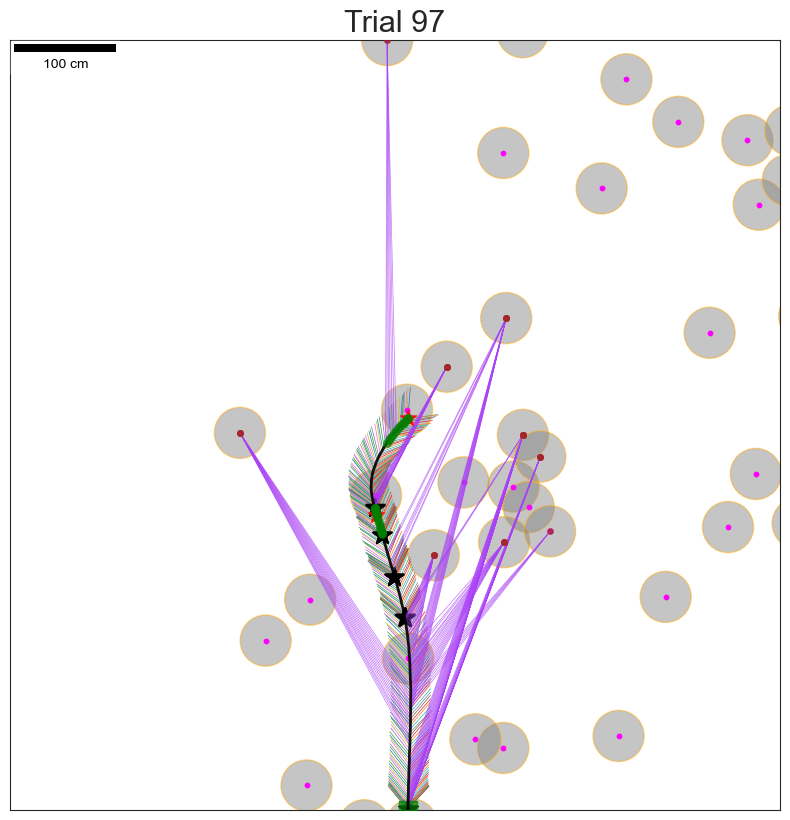

currentTrial: 103 num_trials: 2


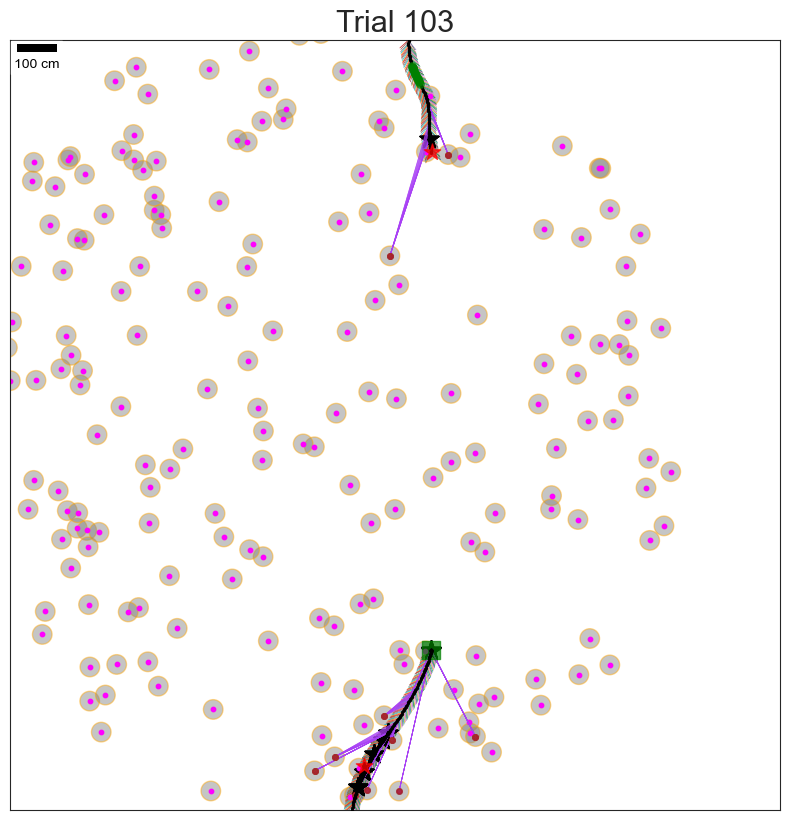

In [39]:

num_trials = 2 


with general_utils.initiate_plot(10,10,100):
  for currentTrial in [96+1, 102+1]: #two_in_a_row[10:20]:
      duration = [data_item.ff_caught_T_new[currentTrial-num_trials], data_item.ff_caught_T_new[currentTrial]]
      plot_trials.PlotTrials(duration, 
                  *data_item.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = currentTrial,
                  num_trials = num_trials,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      